<h1>Project No :52</h1>
<h1>Project Title: To predict the sales of weather sensitive products of Walmart during major weather events</h1>
<h2>Prepared By: Shwet Kumar Jaiswal</h2>

<h1><u>Phase-1: Literature survey & Data Acquisition</u></h1>

#### Importing required Libaries

In [52]:
import pandas as pd     #Data Processing
import numpy as np      #Numerical Computation
import math             #Numerical Calculation
import matplotlib.pyplot as plt      #Visualization
import matplotlib as mpl
%matplotlib inline
import seaborn as sns    #Visualization
from matplotlib.legend_handler import HandlerLine2D
from matplotlib import pyplot

import datetime        #Date fomatting libaries
from datetime import date
import holidays        #Holiday 

import statsmodels.api as sm
from scipy.stats import norm
import pylab

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

# adfuller library 
from statsmodels.tsa.stattools import adfuller

<h4>a. Source of the dataset.</h4>

<p>https://www.kaggle.com/c/walmart-recruiting-sales-in-stormy-weather/data</p>

<h4>b.	Explanation of each feature and datapoint available.</h4>

<h6>'df_Key' have 2 column, which storing information of 45 store and their respective weather station</h6>

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#Reading the data from Key.CSV
df_key = pd.read_csv('/gdrive/MyDrive/Project_52/key.csv')

#Checking if data is loading properly
print(df_key.head())

#Printing Columns whatever we have in the dataset
print(df_key.columns)

#Printing total rows and column we have in the dataset
print(df_key.shape)

   store_nbr  station_nbr
0          1            1
1          2           14
2          3            7
3          4            9
4          5           12
Index(['store_nbr', 'station_nbr'], dtype='object')
(45, 2)


<h6>'df_weather' have twenty column, which storing weather information of 20 weather station from 01-01-2012 to 31.10.2014

<br/>We could see Except station number all Datatype is Object which we need to convert for Numerical Analysis</h6>

In [ ]:
# Reading the data for weather.CSV
df_weather = pd.read_csv('/gdrive/MyDrive/Project_52/weather.csv')

#Checking if data is loading properly
df_weather.head(5)

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2012-01-01,52,31,42,M,36,40,23,0,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
1,2,2012-01-01,48,33,41,16,37,39,24,0,0716,1626,RA,0.0,0.07,28.82,29.91,9.1,23,11.3
2,3,2012-01-01,55,34,45,9,24,36,20,0,0735,1720,,0.0,0.00,29.77,30.47,9.9,31,10.0
3,4,2012-01-01,63,47,55,4,28,43,10,0,0728,1742,,0.0,0.00,29.79,30.48,8.0,35,8.2
4,6,2012-01-01,63,34,49,0,31,43,16,0,0727,1742,,0.0,0.00,29.95,30.47,14.0,36,13.8


In [ ]:
#Printing all Datatypes in the dataset
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20517 entries, 0 to 20516
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   station_nbr  20517 non-null  int64 
 1   date         20517 non-null  object
 2   tmax         20517 non-null  object
 3   tmin         20517 non-null  object
 4   tavg         20517 non-null  object
 5   depart       20517 non-null  object
 6   dewpoint     20517 non-null  object
 7   wetbulb      20517 non-null  object
 8   heat         20517 non-null  object
 9   cool         20517 non-null  object
 10  sunrise      20517 non-null  object
 11  sunset       20517 non-null  object
 12  codesum      20517 non-null  object
 13  snowfall     20517 non-null  object
 14  preciptotal  20517 non-null  object
 15  stnpressure  20517 non-null  object
 16  sealevel     20517 non-null  object
 17  resultspeed  20517 non-null  object
 18  resultdir    20517 non-null  object
 19  avgspeed     20517 non-nu

In [ ]:
#Printing Columns whatever we have in the dataset
print(df_weather.columns)

#Printing total rows and column we have in the dataset
print(df_weather.shape)

Index(['station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'snowfall',
       'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
       'avgspeed'],
      dtype='object')
(20517, 20)


<h6>'df_train' have four column, which storing sales data of 45 store for the 111 products on each dates from 01-01-2012 to 31.10.2014</h6>

In [ ]:
#Reading the data from train.CSV
df_train = pd.read_csv('/gdrive/MyDrive/Project_52/train.csv')

#Checking if the data loading properly
df_train.head(5)

,date,store_nbr,item_nbr,units
0,2012-01-01,1,1,0
1,2012-01-01,1,2,0
2,2012-01-01,1,3,0
3,2012-01-01,1,4,0
4,2012-01-01,1,5,0


In [ ]:
#Printing Columns whatever we have in the dataset
print(df_train.columns)

#Printing total rows and column we have in the dataset
print(df_train.shape)

#Printing all the Datatypes in the dataset
df_train.info()

Index(['date', 'store_nbr', 'item_nbr', 'units'], dtype='object')
(4617600, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617600 entries, 0 to 4617599
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   date       object
 1   store_nbr  int64 
 2   item_nbr   int64 
 3   units      int64 
dtypes: int64(3), object(1)
memory usage: 140.9+ MB


<h4>3.	Key metric (KPI) to optimize<br/>
g.	Code: Implement this metric from scratch in Python using NumPy/Pandas/Scipy only. </h4>

<h4>RMSE: Root Mean Square Error using Numpy</h4>

In [ ]:
y_actual = [1,2,3,4,5]
y_pred = [1.4,2.3,2.7,3,4.2]

# Using RMSE formula by using Math NumPy Module and we get the below value

RMSE = math.sqrt(np.square(np.subtract(y_actual,y_pred)).mean() )

print("Root Mean Square Error:", RMSE)

Root Mean Square Error: 0.6292853089020909


<h4>Comparing RMSE value using sklearn</h4>

In [ ]:
from sklearn.metrics import mean_squared_error

y_actual = [1,2,3,4,5]
y_pred = [1.4,2.3,2.7,3,4.2]

RMSE_sk = math.sqrt(mean_squared_error(y_actual, y_pred))
print("Root Mean Square Error:", RMSE_sk)

Root Mean Square Error: 0.6292853089020909


<h4>RMSLE: Root Mean Squared Logarithmic Error using Numpy</h4>

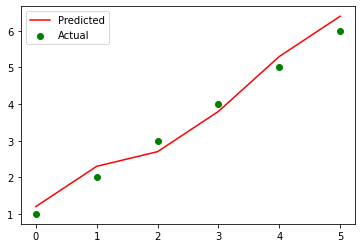

Root Mean Square Logarithmic Error: 0.07231987556527225


In [ ]:
# Checking for Actual and Predicted data stored in list
y_actual = [1,2,3,4,5,6]
y_pred = [1.2,2.3,2.7,3.8,5.3,6.4]

x = list(range(len(y_actual)))

# Visualizing Actual and Predicted output here
plt.scatter(x, y_actual, color="green", label="Actual")
plt.plot(x, y_pred, color="red", label="Predicted")

plt.legend()

plt.show() 

# Using RMSLE formula by using Math NumPy Module and we get the below value
RMSLE = math.sqrt(np.square(np.subtract(np.log1p(y_actual),np.log1p(y_pred))).mean())

print("Root Mean Square Logarithmic Error:", RMSLE)

<h4>Comparing RMSLE value using sklearn</h4>

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

y_actual = [1,2,3,4,5,6]
y_pred = [1.2,2.3,2.7,3.8,5.3,6.4]

# Using RMSLE formula by using Sklearn and we can see the values are matching
RMSLE_sk=np.sqrt(mean_squared_log_error(y_actual, y_pred))

print("RMSLE value using sklearn:", RMSLE_sk)

RMSLE value using sklearn: 0.07231987556527225


<h1><u>Phase 2: EDA and Feature Extraction</u></h1>

#### Key Data: Processing and Cleaning:

In [ ]:
# Converting Store number and Station number to int here
df_key = df_key.astype(int)

df_key.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   store_nbr    45 non-null     int64
 1   station_nbr  45 non-null     int64
dtypes: int64(2)
memory usage: 848.0 bytes


In [ ]:
# Taking back-up of the Original Weather Data Frame here
df_weather_bck = df_weather

#### Splitting ‘Codesum’ data: One hot encoding

In [ ]:
# Storing all the unique weather classification from codesum data in a set
codesum_col = set(' '.join(set(df_weather["codesum"])).strip().split())
codesum_col

{'BCFG',
 'BLDU',
 'BLSN',
 'BR',
 'DU',
 'DZ',
 'FG',
 'FG+',
 'FU',
 'FZDZ',
 'FZFG',
 'FZRA',
 'GR',
 'GS',
 'HZ',
 'MIFG',
 'PL',
 'PRFG',
 'RA',
 'SG',
 'SN',
 'SQ',
 'TS',
 'TSRA',
 'TSSN',
 'UP',
 'VCFG',
 'VCTS'}

In [ ]:
# converting unique codesome data into dataframe here
df_codesum = pd.DataFrame(index=df_weather.index, columns=codesum_col)

In [ ]:
# I am putting '1' for all true value checking from codesome column.
# df_weather_store_trainx = df_weather_store_train
for val in df_codesum.columns:
    for i in range(df_weather.shape[0]):
        if val in df_weather_bck["codesum"][i]:
            df_codesum[val][i] = 1

In [ ]:
#Dropping original codesum column from the weather dataset
df_weather_final= df_weather.drop("codesum", 1)

In [ ]:
# Merging new encoded data set into weather dataframe here
df_weather_final = df_weather_final.join(df_codesum.fillna(0))
df_weather_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20517 entries, 0 to 20516
Data columns (total 47 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   station_nbr  20517 non-null  int64 
 1   date         20517 non-null  object
 2   tmax         20517 non-null  object
 3   tmin         20517 non-null  object
 4   tavg         20517 non-null  object
 5   depart       20517 non-null  object
 6   dewpoint     20517 non-null  object
 7   wetbulb      20517 non-null  object
 8   heat         20517 non-null  object
 9   cool         20517 non-null  object
 10  sunrise      20517 non-null  object
 11  sunset       20517 non-null  object
 12  snowfall     20517 non-null  object
 13  preciptotal  20517 non-null  object
 14  stnpressure  20517 non-null  object
 15  sealevel     20517 non-null  object
 16  resultspeed  20517 non-null  object
 17  resultdir    20517 non-null  object
 18  avgspeed     20517 non-null  object
 19  TSSN         20517 non-nu

#### Key and Weather Data merging:

In [ ]:
# Merging final weather dataset by using df_key dataframe using station as key
df_weather_store = pd.merge(df_key,df_weather_final,on='station_nbr')

# reviewing the dataafter merging
df_weather_store.head()

,store_nbr,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,TSSN,BLSN,FZRA,UP,HZ,PRFG,BLDU,TSRA,DU,SN,FZDZ,VCTS,RA,BR,MIFG,SQ,SG,FZFG,FG+,BCFG,GR,VCFG,GS,FG,DZ,PL,TS,FU
0,1,1,2012-01-01,52,31,42,M,36,40,23,0,-,-,M,0.05,29.78,29.92,3.6,20,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1,1,2012-01-02,50,31,41,M,26,35,24,0,-,-,M,0.01,29.44,29.62,9.8,24,10.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,2012-01-03,32,11,22,M,4,18,43,0,-,-,M,0.00,29.67,29.87,10.8,31,11.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,2012-01-04,28,9,19,M,-1,14,46,0,-,-,M,0.00,29.86,30.03,6.3,27,8.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,2012-01-05,38,25,32,M,13,25,33,0,-,-,M,0.00,29.67,29.84,6.9,25,7.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Training and Weather+Key Data merging:

In [ ]:
# Merging weather and training data based on date and store number
df_weather_store_train = pd.merge(df_train,df_weather_store, on=['store_nbr','date'], how='inner')

# Reviewing data merged properly
df_weather_store_train.head()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,TSSN,BLSN,FZRA,UP,HZ,PRFG,BLDU,TSRA,DU,SN,FZDZ,VCTS,RA,BR,MIFG,SQ,SG,FZFG,FG+,BCFG,GR,VCFG,GS,FG,DZ,PL,TS,FU
0,2012-01-01,1,1,0,1,52,31,42,M,36,40,23,0,-,-,M,0.05,29.78,29.92,3.6,20,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,2012-01-01,1,2,0,1,52,31,42,M,36,40,23,0,-,-,M,0.05,29.78,29.92,3.6,20,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,2012-01-01,1,3,0,1,52,31,42,M,36,40,23,0,-,-,M,0.05,29.78,29.92,3.6,20,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,2012-01-01,1,4,0,1,52,31,42,M,36,40,23,0,-,-,M,0.05,29.78,29.92,3.6,20,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,2012-01-01,1,5,0,1,52,31,42,M,36,40,23,0,-,-,M,0.05,29.78,29.92,3.6,20,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_weather_store_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4617600 entries, 0 to 4617599
Data columns (total 50 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   date         object
 1   store_nbr    int64 
 2   item_nbr     int64 
 3   units        int64 
 4   station_nbr  int64 
 5   tmax         object
 6   tmin         object
 7   tavg         object
 8   depart       object
 9   dewpoint     object
 10  wetbulb      object
 11  heat         object
 12  cool         object
 13  sunrise      object
 14  sunset       object
 15  snowfall     object
 16  preciptotal  object
 17  stnpressure  object
 18  sealevel     object
 19  resultspeed  object
 20  resultdir    object
 21  avgspeed     object
 22  TSSN         int64 
 23  BLSN         int64 
 24  FZRA         int64 
 25  UP           int64 
 26  HZ           int64 
 27  PRFG         int64 
 28  BLDU         int64 
 29  TSRA         int64 
 30  DU           int64 
 31  SN           int64 
 32  FZDZ         int64 
 33  VCTS   

<h3>Processing and Cleaning and Visualization</h3>

#### Date datatype conversion:

In [ ]:
# converting date column into the date format so we can split the dates trend analysis
df_weather_store_train["date"] = df_weather_store_train["date"].map(pd.to_datetime)

Based on our initial review, we observed that most of weather feature have missing data or string value due to that data type is stored as object type. Which we must convert to numeric datatype to perform any numerical analysis.

As mentioned in the 'noaa_weather_qclcd_documentation.pdf'

M - Missing data, or data that is normally nor supported by the station

“*" - not supported by the station

“-" - values is not available for sunset/sunrise

Hence, we decided to replace them from the data with ‘None’, so we don’t get error during datatype conversion.

#### Replacing string value with None:

In [ ]:
# Storing all columns in a list for datatype conversion
weatherx = ['tmax', 'tmin', 'tavg', 'depart', 'dewpoint','wetbulb', 'heat', 'cool', 'sunrise', 
            'sunset','snowfall','preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir','avgspeed']

In [ ]:
# Storing Weather Data as List
weather_cols = df_weather_store_train.columns

# Replacing 'M' and "*" and "-" with NaN for Data type conversion here
df_weather_store_train[weather_cols] = df_weather_store_train[weather_cols].replace({"M":np.nan, "-":np.nan,"*":np.nan})

Since, we have 'T' Trace values in weather features like snowfall and precipitation we have to format them too for data type conversion.

As per Wikipedia we understood a trace denotes an amount of precipitation, such as rain or snow. It is greater than zero but it is too small to be measured by standard units or methods of measurement.

Example: 

Snowfall Measure in Inches but when it is less than 0.1 inch. It marked as TRACE-'T'. As we know the value is greater than zero replacing them with zero won’t be a correct assumption therefore, to distinguish it from zero, we replaced all ‘T’ values with '0.01' Inches as it is less than ‘0.1’ but great than ‘0’.

Same principle applied for 'preciptotal' but here the measurement scale is '0.01' Inches hence we are replacing it with '0.001' Inches.

In [ ]:
# Removing additional space from the snowfall column data
df_weather_store_train['snowfall'] = df_weather_store_train['snowfall'].astype(str).str.strip()

# Removing additional space from the preciptotal column data
df_weather_store_train['preciptotal'] = df_weather_store_train['preciptotal'].astype(str).str.strip()

#### Data replacement of the ‘Trace’ value in snowfall and 'preciptotal data:

In [ ]:
# Replacing 'T' values with 0.01 as per the above explanation.
df_weather_store_train["snowfall"] = df_weather_store_train["snowfall"].map(lambda x : 0.01 if(x=='T') else float(x))
                                                                                          
# Replacing 'T' values with 0.001 as per the above explanation.                                                                                          

df_weather_store_train["preciptotal"] = df_weather_store_train["preciptotal"].map(lambda x : 0.001 if(x=='T') else float(x))

#### Data type conversion:

In [ ]:
# Converting all above mentioned column to float
df_weather_store_train[weatherx] = df_weather_store_train[weatherx].astype(float)

In [ ]:
# Reviewing data conversion done successfully

df_weather_store_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4617600 entries, 0 to 4617599
Data columns (total 50 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   item_nbr     int64         
 3   units        int64         
 4   station_nbr  int64         
 5   tmax         float64       
 6   tmin         float64       
 7   tavg         float64       
 8   depart       float64       
 9   dewpoint     float64       
 10  wetbulb      float64       
 11  heat         float64       
 12  cool         float64       
 13  sunrise      float64       
 14  sunset       float64       
 15  snowfall     float64       
 16  preciptotal  float64       
 17  stnpressure  float64       
 18  sealevel     float64       
 19  resultspeed  float64       
 20  resultdir    float64       
 21  avgspeed     float64       
 22  TSSN         int64         
 23  BLSN         int64         
 24  FZRA         int64      

<h4>Weather data :Univarite Analysis<br/><br/>
Plotting univariate distributions on Numeric weather feature before processing:</h4>

<p>The most easiest way to take a quick look at a univariate distribution in seaborn is the distplot() function. 
By default, it will draw a histogram and fit a kernel density estimate (KDE). We have norm parameter to validate whether data is normally distributed.</p>

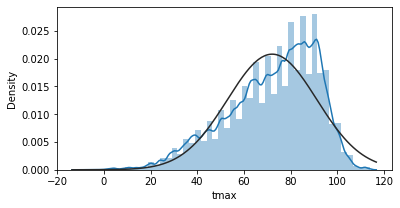

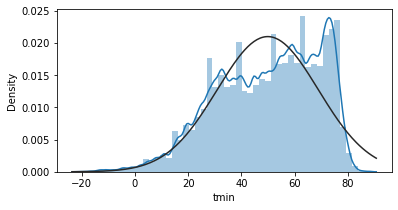

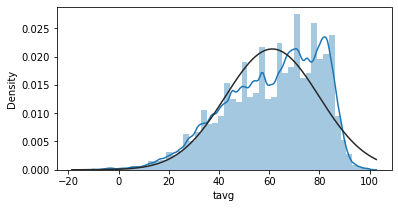

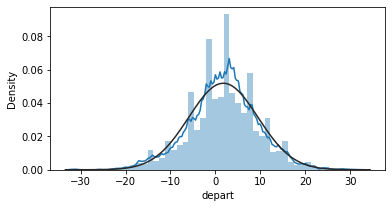

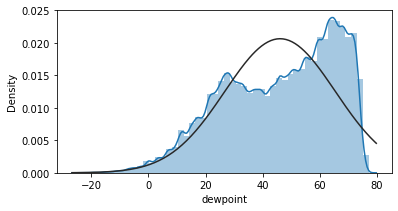

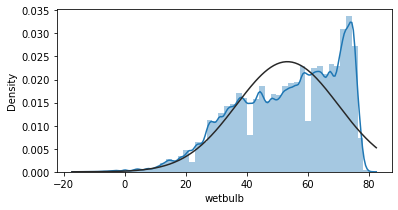

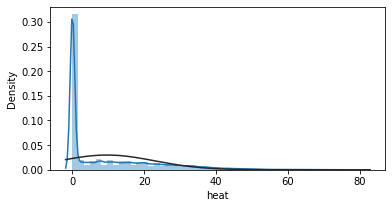

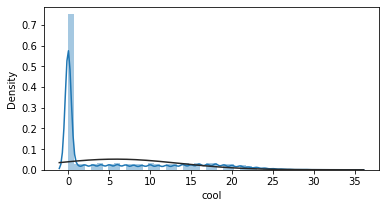

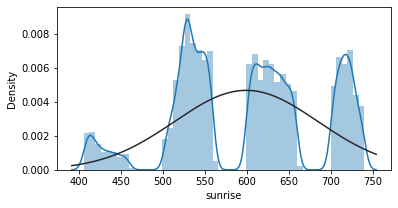

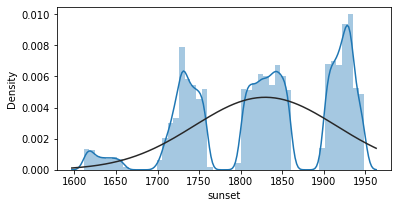

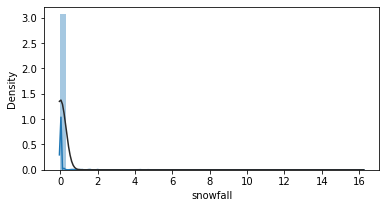

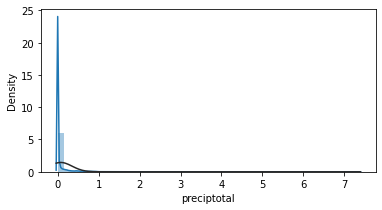

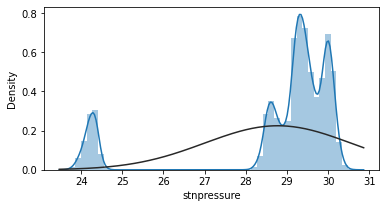

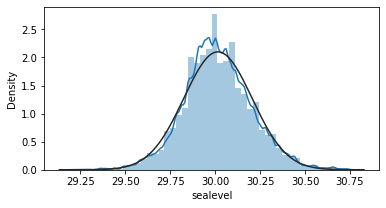

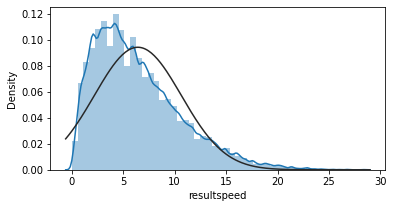

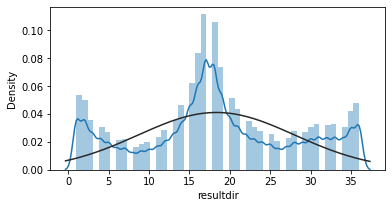

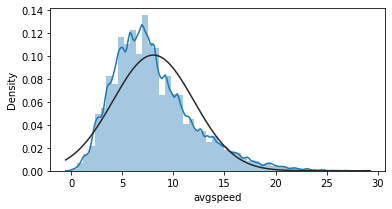

In [ ]:
for cat in weatherx:
    plt.figure(figsize=(6,3))
    sns.distplot(df_weather_store_train[cat],kde=True, fit=norm)

plt.show()

<h4><center>Weather feature observation</center></h4>

<table>
  <tr>
	<td>Feature Name</td>
	<td>Min Value</td>
	<td>Max Value</td>
	<td>Mean Value</td>
      <td><center>Observation</center></td>
  </tr>
  <tr>
	<td>tmax</td>
	<td>-11</td>
	<td>114.00</td>
	<td>71.62</td>
	<td>Temperature features observed trending they are increasing drastically and then decrease in a much mild trend. Data distribution is negatively skewed.</td>
  </tr>
  <tr>
	<td>tmin</td>
	<td>-21</td>
	<td>88.00</td>
	<td>50.65</td>
	<td>Same as above</td>
  </tr>
  <tr>
	<td>tavg</td>
	<td>-16</td>
	<td>100.00</td>
	<td>61.24</td>
	<td>Same as above</td>
  </tr>
  <tr>
	<td>depart</td>
	<td>-35</td>
	<td>33.00</td>
	<td>1.36</td>
	<td>From the visual it is confirmed ttemperature departure from the normal.</td>
  </tr>
  <tr>
	<td>dewpoint</td>
	<td>-24</td>
	<td>77.00</td>
	<td>47.27</td>
	<td>The average dewpoint data distribution is negatively skewed and shows two peaks next to each other.</td>
  </tr>
  <tr>
	<td>wetbulb</td>
	<td>-15</td>
	<td>80.00</td>
	<td>53.88</td>
	<td>Wet bulb shows considerably increase at the starting and stays high till a certain level. We could say data is negatively skewed.</td>
  </tr>
  <tr>
	<td>heat</td>
	<td>0</td>
	<td>81.00</td>
	<td>9.70</td>
	<td>From plot we can see most of the data have zero or missing value.</td>
  </tr>
  <tr>
	<td>cool</td>
	<td>0</td>
	<td>35.00</td>
	<td>5.94</td>
	<td>From plot we can see most of the data have zero or missing value.</td>
  </tr>
  <tr>
	<td>sunrise</td>
	<td>406</td>
	<td>740.00</td>
	<td>585.03</td>
	<td>Mostly have zero or missing data, it has few peaks and have symmetric distribution.</td>
  </tr>
  <tr>
	<td>sunset</td>
	<td>1611</td>
	<td>1949.00</td>
	<td>1823.38</td>
	<td>Same as above.</td>
  </tr>
  <tr>
	<td>snowfall</td>
	<td>0</td>
	<td>16.20</td>
	<td>0.04</td>
	<td>From plot we can see most of the data have zero or missing value or below calculation threshold.</td>
  </tr>
  <tr>
	<td>preciptotal</td>
	<td>0</td>
	<td>7.36</td>
	<td>0.10</td>
	<td>From plot we can see most of the data have zero or missing value or below calculation threshold.</td>
  </tr>
  <tr>
	<td>stnpressure</td>
	<td>23.72</td>
	<td>30.61</td>
	<td>29.16</td>
	<td>Station pressure is negatively skewed.</td>
  </tr>
  <tr>
	<td>sealevel</td>
	<td>29.16</td>
	<td>30.80</td>
	<td>30.00</td>
	<td>Sea level is almost following normal distribution.</td>
  </tr>
  <tr>
	<td>resultspeed</td>
	<td>0</td>
	<td>28.40</td>
	<td>6.46</td>
	<td>Resultant wind speed is positive-skewed and formed a bell-shaped curve.</td>
  </tr>
  <tr>
	<td>resultdir</td>
	<td>1</td>
	<td>36.00</td>
	<td>18.72</td>
	<td>Resultant direction starts and ends with a high peak but the highest peak is at the middle of the distribution.</td>
  </tr>
  <tr>
	<td>avgspeed</td>
	<td>0</td>
	<td>28.70</td>
	<td>7.91</td>
	<td>Resultant wind speed is positive-skewed and formed a bell-shaped curve.</td>
  </tr>
  </table>

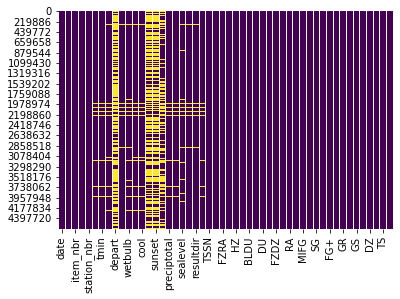

In [ ]:
# Visualizing the missing values in the weather data here

sns.heatmap(df_weather_store_train.isnull(),cbar=False,cmap='viridis')

We observed many features in weather data which has missing value, so I decided to replace them with mean value. But while performing the step I observed that few weather stations have huge variance and if I take mean for all station data may lead to wrong interpretation.

In [ ]:
# Checking how many null value,  we have in the dataset ineach column
df_weather_store_train.isnull().sum()

date                 0
store_nbr            0
item_nbr             0
units                0
station_nbr          0
tmax            111444
tmin            111333
tavg            187701
depart         3070038
dewpoint         91020
wetbulb         167499
heat            187701
cool            187701
sunrise        2680539
sunset         2680539
snowfall       1656786
preciptotal      98901
stnpressure     109890
sealevel        214674
resultspeed      75480
resultdir        75480
avgspeed        101454
TSSN                 0
BLSN                 0
FZRA                 0
UP                   0
HZ                   0
PRFG                 0
BLDU                 0
TSRA                 0
DU                   0
SN                   0
FZDZ                 0
VCTS                 0
RA                   0
BR                   0
MIFG                 0
SQ                   0
SG                   0
FZFG                 0
FG+                  0
BCFG                 0
GR                   0
VCFG       

#### Weather data :Statistical Summary before scaling and missing value replacemnt

In [ ]:
# Review before outlier treatment
df_weather_store_train[weatherx].describe(include="all")

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
count,4.506156e+06,4.506267e+06,4.429899e+06,1.547562e+06,4.526580e+06,4.450101e+06,4.429899e+06,4.429899e+06,1.937061e+06,1.937061e+06,2.960814e+06,4.518699e+06,4.507710e+06,4.402926e+06,4.542120e+06,4.542120e+06,4.516146e+06
mean,7.208237e+01,4.990364e+01,6.118294e+01,1.752977e+00,4.606856e+01,5.320533e+01,9.629683e+00,5.812624e+00,5.995401e+02,1.829721e+03,1.565944e-02,7.323702e-02,2.877339e+01,3.001520e+01,6.422996e+00,1.833697e+01,8.038657e+00
std,1.916853e+01,1.901434e+01,1.869531e+01,7.700571e+00,1.933489e+01,1.671007e+01,1.332038e+01,7.754646e+00,8.550917e+01,8.565187e+01,2.891909e-01,2.762140e-01,1.773329e+00,1.900272e-01,4.229022e+00,9.704653e+00,3.952473e+00
min,-1.100000e+01,-2.100000e+01,-1.600000e+01,-3.200000e+01,-2.400000e+01,-1.500000e+01,0.000000e+00,0.000000e+00,4.060000e+02,1.611000e+03,0.000000e+00,0.000000e+00,2.372000e+01,2.916000e+01,0.000000e+00,1.000000e+00,0.000000e+00
25%,6.000000e+01,3.500000e+01,4.800000e+01,-3.000000e+00,3.100000e+01,4.100000e+01,0.000000e+00,0.000000e+00,5.330000e+02,1.749000e+03,0.000000e+00,0.000000e+00,2.877000e+01,2.990000e+01,3.200000e+00,1.300000e+01,5.200000e+00
50%,7.600000e+01,5.200000e+01,6.400000e+01,2.000000e+00,4.900000e+01,5.600000e+01,1.000000e+00,0.000000e+00,6.100000e+02,1.835000e+03,0.000000e+00,0.000000e+00,2.934000e+01,3.001000e+01,5.600000e+00,1.800000e+01,7.300000e+00
75%,8.700000e+01,6.600000e+01,7.700000e+01,6.000000e+00,6.300000e+01,6.800000e+01,1.700000e+01,1.200000e+01,6.540000e+02,1.915000e+03,0.000000e+00,1.000000e-03,2.980000e+01,3.013000e+01,8.800000e+00,2.500000e+01,1.020000e+01
max,1.140000e+02,8.800000e+01,1.000000e+02,3.300000e+01,7.700000e+01,8.000000e+01,8.100000e+01,3.500000e+01,7.400000e+02,1.949000e+03,1.620000e+01,7.360000e+00,3.061000e+01,3.080000e+01,2.840000e+01,3.600000e+01,2.870000e+01


#### Outlier treatment:

In [ ]:
# Removing Outlier Data from weather data
# Outlier Treatment with threshold 0.99 and 0.01 on weather data
for weathercat in weatherx:
    upper_limit_w = df_weather_store_train[weathercat].quantile(0.99)
    print('upper_limit: ', weathercat, ": ",upper_limit_w)
    
    lower_limit_w = df_weather_store_train[weathercat].quantile(0.01)
    print('lower_limit:', weathercat, ": ",lower_limit_w)

df_weather_store_train = df_weather_store_train[(df_weather_store_train[weathercat] <= upper_limit_w) & (df_weather_store_train[weathercat] >= lower_limit_w)]
df_weather_store_train

upper_limit:  tmax :  104.0
lower_limit: tmax :  22.0
upper_limit:  tmin :  79.0
lower_limit: tmin :  4.0
upper_limit:  tavg :  90.0
lower_limit: tavg :  14.0
upper_limit:  depart :  20.0
lower_limit: depart :  -17.0
upper_limit:  dewpoint :  74.0
lower_limit: dewpoint :  0.0
upper_limit:  wetbulb :  77.0
lower_limit: wetbulb :  12.0
upper_limit:  heat :  51.0
lower_limit: heat :  0.0
upper_limit:  cool :  25.0
lower_limit: cool :  0.0
upper_limit:  sunrise :  738.0
lower_limit: sunrise :  411.0
upper_limit:  sunset :  1948.0
lower_limit: sunset :  1618.0
upper_limit:  snowfall :  0.010000000000000002
lower_limit: snowfall :  0.0
upper_limit:  preciptotal :  1.09
lower_limit: preciptotal :  0.0
upper_limit:  stnpressure :  30.27
lower_limit: stnpressure :  23.99
upper_limit:  sealevel :  30.5
lower_limit: sealevel :  29.57
upper_limit:  resultspeed :  19.2
lower_limit: resultspeed :  0.5
upper_limit:  resultdir :  36.0
lower_limit: resultdir :  1.0
upper_limit:  avgspeed :  20.0
lower_

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,TSSN,BLSN,FZRA,UP,HZ,PRFG,BLDU,TSRA,DU,SN,FZDZ,VCTS,RA,BR,MIFG,SQ,SG,FZFG,FG+,BCFG,GR,VCFG,GS,FG,DZ,PL,TS,FU
0,2012-01-01,1,1,0,1,52.0,31.0,42.0,NaN,36.0,40.0,23.0,0.0,NaN,NaN,NaN,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,2012-01-01,1,2,0,1,52.0,31.0,42.0,NaN,36.0,40.0,23.0,0.0,NaN,NaN,NaN,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,2012-01-01,1,3,0,1,52.0,31.0,42.0,NaN,36.0,40.0,23.0,0.0,NaN,NaN,NaN,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,2012-01-01,1,4,0,1,52.0,31.0,42.0,NaN,36.0,40.0,23.0,0.0,NaN,NaN,NaN,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,2012-01-01,1,5,0,1,52.0,31.0,42.0,NaN,36.0,40.0,23.0,0.0,NaN,NaN,NaN,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617595,2014-10-31,45,107,0,16,53.0,34.0,44.0,NaN,35.0,41.0,21.0,0.0,NaN,NaN,NaN,0.00,29.90,29.99,4.5,3.0,5.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4617596,2014-10-31,45,108,0,16,53.0,34.0,44.0,NaN,35.0,41.0,21.0,0.0,NaN,NaN,NaN,0.00,29.90,29.99,4.5,3.0,5.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4617597,2014-10-31,45,109,0,16,53.0,34.0,44.0,NaN,35.0,41.0,21.0,0.0,NaN,NaN,NaN,0.00,29.90,29.99,4.5,3.0,5.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4617598,2014-10-31,45,110,0,16,53.0,34.0,44.0,NaN,35.0,41.0,21.0,0.0,NaN,NaN,NaN,0.00,29.90,29.99,4.5,3.0,5.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Weather data :Statistical Summary after preprocessing

In [ ]:
# Now we can get weather data statistic feature of in a single place
df_weather_store_train[weatherx].describe(include="all")

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
count,4.419132e+06,4.419243e+06,4.346871e+06,1.515816e+06,4.394046e+06,4.361412e+06,4.346871e+06,4.346871e+06,1.813074e+06,1.813074e+06,2.892882e+06,4.429677e+06,4.419465e+06,4.278162e+06,4.407588e+06,4.407588e+06,4.430232e+06
mean,7.216407e+01,4.998347e+01,6.125934e+01,1.738943e+00,4.622516e+01,5.329238e+01,9.593728e+00,5.853068e+00,6.022806e+02,1.833067e+03,1.467923e-02,7.375854e-02,2.877060e+01,3.001562e+01,6.312504e+00,1.827324e+01,7.963893e+00
std,1.917222e+01,1.901704e+01,1.870127e+01,7.620833e+00,1.932827e+01,1.670414e+01,1.330065e+01,7.779768e+00,8.330134e+01,8.293572e+01,2.770148e-01,2.777050e-01,1.782911e+00,1.878456e-01,3.967340e+00,9.709306e+00,3.672909e+00
min,-1.100000e+01,-2.100000e+01,-1.600000e+01,-3.200000e+01,-2.400000e+01,-1.500000e+01,0.000000e+00,0.000000e+00,4.060000e+02,1.611000e+03,0.000000e+00,0.000000e+00,2.372000e+01,2.916000e+01,0.000000e+00,1.000000e+00,1.500000e+00
25%,6.000000e+01,3.500000e+01,4.800000e+01,-3.000000e+00,3.100000e+01,4.100000e+01,0.000000e+00,0.000000e+00,5.350000e+02,1.752000e+03,0.000000e+00,0.000000e+00,2.877000e+01,2.990000e+01,3.200000e+00,1.300000e+01,5.300000e+00
50%,7.600000e+01,5.200000e+01,6.400000e+01,2.000000e+00,4.900000e+01,5.600000e+01,1.000000e+00,0.000000e+00,6.110000e+02,1.837000e+03,0.000000e+00,0.000000e+00,2.934000e+01,3.001000e+01,5.500000e+00,1.800000e+01,7.300000e+00
75%,8.700000e+01,6.600000e+01,7.700000e+01,6.000000e+00,6.300000e+01,6.800000e+01,1.700000e+01,1.200000e+01,6.550000e+02,1.916000e+03,0.000000e+00,1.000000e-03,2.980000e+01,3.013000e+01,8.700000e+00,2.500000e+01,1.000000e+01
max,1.140000e+02,8.800000e+01,1.000000e+02,3.300000e+01,7.700000e+01,8.000000e+01,8.100000e+01,3.500000e+01,7.400000e+02,1.949000e+03,1.620000e+01,7.360000e+00,3.061000e+01,3.080000e+01,2.000000e+01,3.600000e+01,2.000000e+01


#### Missing value replacement with mean value Station-wise:

In [ ]:
# Replacing missing data with the mean value of the respective column based on each station
for weathercat in weatherx:
    for stn_cat in range(1, 21):
        df_weather_store_train.loc[(df_weather_store_train[weathercat].isnull()) & (df_weather_store_train["station_nbr"]==stn_cat), weathercat] = df_weather_store_train[weathercat].fillna(df_weather_store_train[weathercat].mean())

In [ ]:
# Checking whether we have any further null values
df_weather_store_train.isnull().sum()

date           0
store_nbr      0
item_nbr       0
units          0
station_nbr    0
tmax           0
tmin           0
tavg           0
depart         0
dewpoint       0
wetbulb        0
heat           0
cool           0
sunrise        0
sunset         0
snowfall       0
preciptotal    0
stnpressure    0
sealevel       0
resultspeed    0
resultdir      0
avgspeed       0
TSSN           0
BLSN           0
FZRA           0
UP             0
HZ             0
PRFG           0
BLDU           0
TSRA           0
DU             0
SN             0
FZDZ           0
VCTS           0
RA             0
BR             0
MIFG           0
SQ             0
SG             0
FZFG           0
FG+            0
BCFG           0
GR             0
VCFG           0
GS             0
FG             0
DZ             0
PL             0
TS             0
FU             0
dtype: int64

<p>We observed many features in weather data have missing value so we decided to replace them with mean value. 

But while performing the step we observed few weather stations have huge variance and if we take mean all station data may lead to wrong interpretation.

<br/>Hence as an alternative we decided to merge calculate the mean for each feature station wise and replace them with the mean value.

After performing this step, we again the missing value now we can see we don’t have any missing value.</p>

In [ ]:
# Review the same statistic after missing value imputation
df_weather_store_train[weatherx].describe(exclude="object")

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
count,4.430232e+06,4.430232e+06,4.430232e+06,4.430232e+06,4.430232e+06,4.430232e+06,4.430232e+06,4.430232e+06,4.430232e+06,4.430232e+06,4.430232e+06,4.430232e+06,4.430232e+06,4.430232e+06,4.430232e+06,4.430232e+06,4.430232e+06
mean,7.216407e+01,4.998347e+01,6.125934e+01,1.738943e+00,4.622516e+01,5.329238e+01,9.593728e+00,5.853068e+00,6.022806e+02,1.833067e+03,1.467923e-02,7.375854e-02,2.877060e+01,3.001562e+01,6.312504e+00,1.827324e+01,7.963893e+00
std,1.914819e+01,1.899344e+01,1.852449e+01,4.457716e+00,1.924917e+01,1.657389e+01,1.317492e+01,7.706226e+00,5.329009e+01,5.305619e+01,2.238489e-01,2.776876e-01,1.780743e+00,1.845935e-01,3.957188e+00,9.684461e+00,3.672909e+00
min,-1.100000e+01,-2.100000e+01,-1.600000e+01,-3.200000e+01,-2.400000e+01,-1.500000e+01,0.000000e+00,0.000000e+00,4.060000e+02,1.611000e+03,0.000000e+00,0.000000e+00,2.372000e+01,2.916000e+01,0.000000e+00,1.000000e+00,1.500000e+00
25%,6.000000e+01,3.500000e+01,4.800000e+01,1.738943e+00,3.100000e+01,4.100000e+01,0.000000e+00,0.000000e+00,6.022806e+02,1.833067e+03,0.000000e+00,0.000000e+00,2.877000e+01,2.990000e+01,3.200000e+00,1.300000e+01,5.300000e+00
50%,7.600000e+01,5.200000e+01,6.400000e+01,1.738943e+00,4.900000e+01,5.500000e+01,1.000000e+00,0.000000e+00,6.022806e+02,1.833067e+03,0.000000e+00,0.000000e+00,2.934000e+01,3.001000e+01,5.600000e+00,1.800000e+01,7.300000e+00
75%,8.700000e+01,6.600000e+01,7.600000e+01,1.738943e+00,6.300000e+01,6.800000e+01,1.700000e+01,1.100000e+01,6.022806e+02,1.833067e+03,1.467923e-02,1.000000e-03,2.980000e+01,3.013000e+01,8.700000e+00,2.500000e+01,1.000000e+01
max,1.140000e+02,8.800000e+01,1.000000e+02,3.300000e+01,7.700000e+01,8.000000e+01,8.100000e+01,3.500000e+01,7.400000e+02,1.949000e+03,1.620000e+01,7.360000e+00,3.061000e+01,3.080000e+01,2.000000e+01,3.600000e+01,2.000000e+01


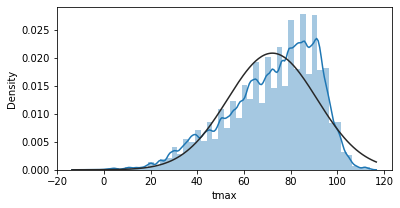

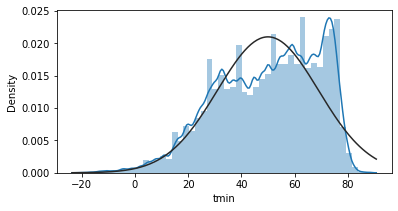

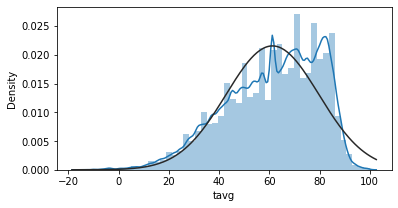

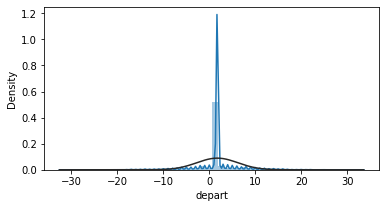

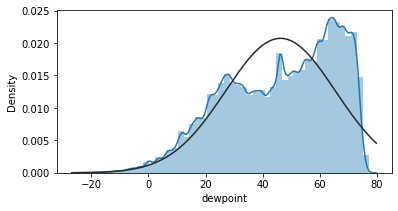

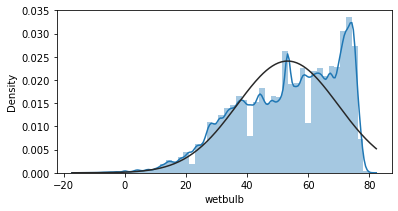

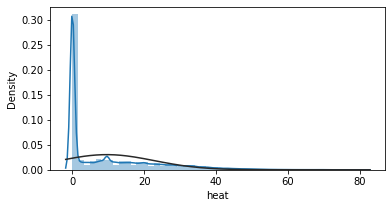

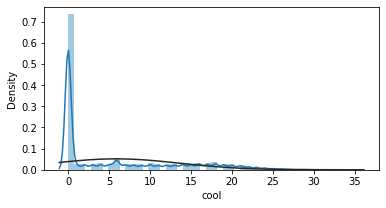

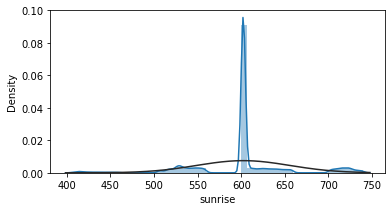

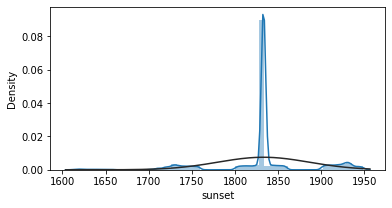

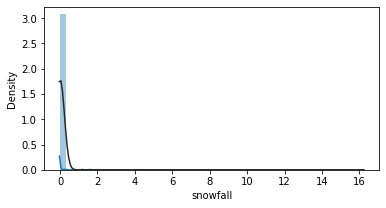

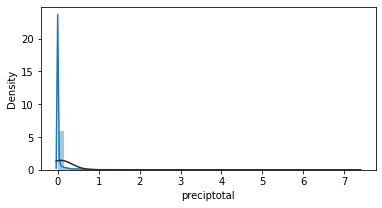

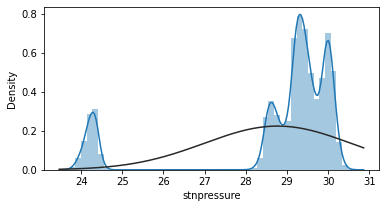

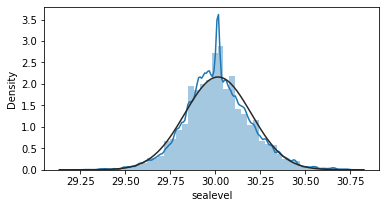

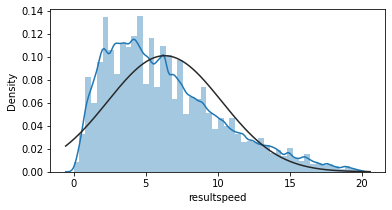

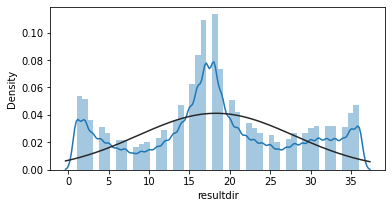

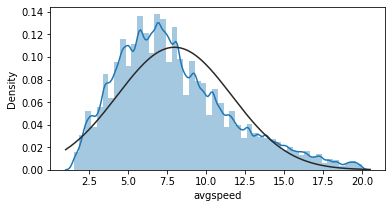

In [ ]:
# Reviewing data after outlier treatment here
for cat in weatherx:
    plt.figure(figsize=(6,3))
    sns.distplot(df_weather_store_train[cat],kde=True, fit=norm)

plt.show()

In [ ]:
# Final Check before spliting
df_weather_store_train.isnull().sum()

date           0
store_nbr      0
item_nbr       0
units          0
station_nbr    0
tmax           0
tmin           0
tavg           0
depart         0
dewpoint       0
wetbulb        0
heat           0
cool           0
sunrise        0
sunset         0
snowfall       0
preciptotal    0
stnpressure    0
sealevel       0
resultspeed    0
resultdir      0
avgspeed       0
TSSN           0
BLSN           0
FZRA           0
UP             0
HZ             0
PRFG           0
BLDU           0
TSRA           0
DU             0
SN             0
FZDZ           0
VCTS           0
RA             0
BR             0
MIFG           0
SQ             0
SG             0
FZFG           0
FG+            0
BCFG           0
GR             0
VCFG           0
GS             0
FG             0
DZ             0
PL             0
TS             0
FU             0
dtype: int64

In [ ]:
# Counting number of sales in each store during whole time period.
df_weather_store_train['store_nbr'].value_counts().sort_index()

1     101121
2      93684
3      92463
4     105117
5      98235
6      93684
7     101454
8      99900
9     102453
10     98235
11     99234
12    100344
13    101454
14    103785
15    111333
16     93573
17    103785
18    102453
19     89022
20     92463
21     99900
22     99234
23    102453
24    105117
25    111333
26    102453
27     99234
28     92463
29     99900
30     95904
31    102453
32    111333
33     99900
34    102453
35      3330
36    106227
37    111333
38     93684
39    102120
40    111333
41     98235
42     93684
43    100344
44     98235
45    103785
Name: store_nbr, dtype: int64

<u>Univariate Analysis and Visualization of Store wise sales:</u><br/>

We have decided to group data store wise and visualize the sales units by each store.

We observed Store number 15, 25, 32, 37, 40 have highest sales units of 112221 where Store no 35 have lowest 94461 units sales.

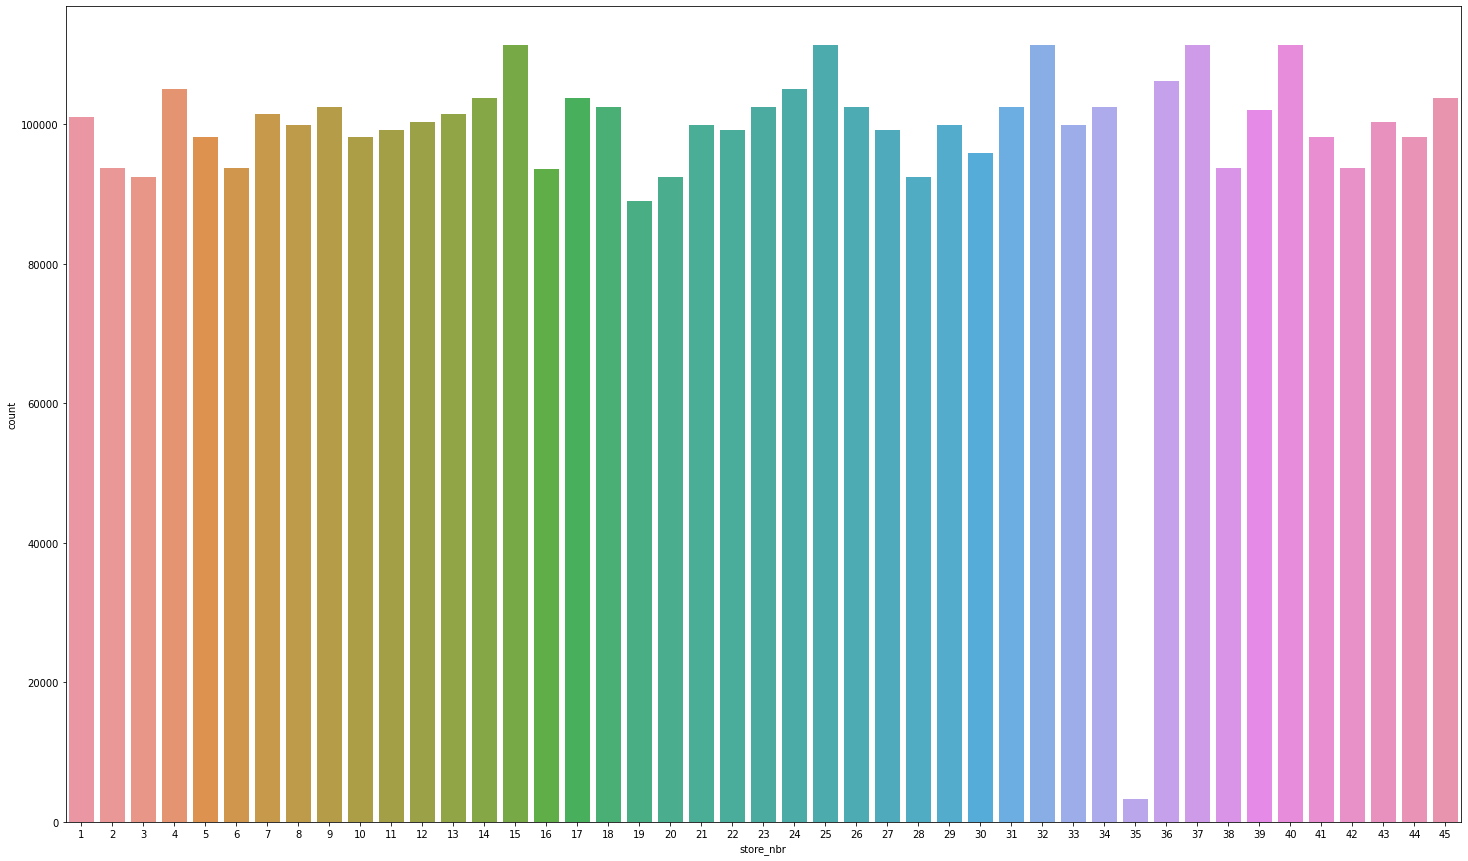

In [ ]:
# Visualizing number of sales in each store.
plt.figure(figsize=(25,15))

sns.countplot(df_weather_store_train['store_nbr'])

plt.show()

<u>Aggregation of Sales unit with Date and Store: </u><br/>

<li>	We aggregated the data with date, store number and item number and observed the store wise sales of each item on each date. (Visualization shown below)</li>


<li>	We aggregated the data with date and item number and observed the unit sales of each item on each date.</li>

<li>	We aggregated the data with store no and item number and observed the unit sales of each item on each store.</li>

<li>	We aggregated the data for each item number and observed the unit sales of each item and also reviewed the top 50 sold units in which date and for which items. </li>

<li>	We have visualized the sales data across the store and observed that Item no 5, 9, 36, 45 are most frequently sold items.</li>

<li>	We observed Item no 5 at store no 37 sold 5568 and 3369 units on dated 15.11.2012 and 21.11.2021. Since it is 10x and 8x more than any other sale of any item it looks erroneous of us. </li>

<li>	We observed from statistical summary average sales is approx.10 units before we removed the 0 sales records. After moving them we got a mean of 38 units. </li>

In [ ]:
# We observed most of the item in each store sales is zero.
df_sales_zero = df_weather_store_train[df_train['units'] == 0]
df_sales_zero

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,TSSN,BLSN,FZRA,UP,HZ,PRFG,BLDU,TSRA,DU,SN,FZDZ,VCTS,RA,BR,MIFG,SQ,SG,FZFG,FG+,BCFG,GR,VCFG,GS,FG,DZ,PL,TS,FU
0,2012-01-01,1,1,0,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,2012-01-01,1,2,0,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,2012-01-01,1,3,0,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,2012-01-01,1,4,0,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,2012-01-01,1,5,0,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617595,2014-10-31,45,107,0,16,53.0,34.0,44.0,1.738943,35.0,41.0,21.0,0.0,602.28058,1833.067038,0.014679,0.00,29.90,29.99,4.5,3.0,5.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4617596,2014-10-31,45,108,0,16,53.0,34.0,44.0,1.738943,35.0,41.0,21.0,0.0,602.28058,1833.067038,0.014679,0.00,29.90,29.99,4.5,3.0,5.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4617597,2014-10-31,45,109,0,16,53.0,34.0,44.0,1.738943,35.0,41.0,21.0,0.0,602.28058,1833.067038,0.014679,0.00,29.90,29.99,4.5,3.0,5.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4617598,2014-10-31,45,110,0,16,53.0,34.0,44.0,1.738943,35.0,41.0,21.0,0.0,602.28058,1833.067038,0.014679,0.00,29.90,29.99,4.5,3.0,5.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Datewise sales in each store for each product
df_sales_store_date = df_weather_store_train[['date','store_nbr','item_nbr']]

df_sales_store_date = pd.pivot_table(df_weather_store_train, index=['date','store_nbr','item_nbr'], aggfunc='sum')

df_sales_store_date

BCFG  BLDU  BLSN  BR  ...  tmax  tmin  units  wetbulb
date       store_nbr item_nbr                        ...                            
2012-01-01 1         1            0     0     0   1  ...  52.0  31.0      0     40.0
                     2            0     0     0   1  ...  52.0  31.0      0     40.0
                     3            0     0     0   1  ...  52.0  31.0      0     40.0
                     4            0     0     0   1  ...  52.0  31.0      0     40.0
                     5            0     0     0   1  ...  52.0  31.0      0     40.0
...                             ...   ...   ...  ..  ...   ...   ...    ...      ...
2014-10-31 45        107          0     0     0   0  ...  53.0  34.0      0     41.0
                     108          0     0     0   0  ...  53.0  34.0      0     41.0
                     109          0     0     0   0  ...  53.0  34.0      0     41.0
                     110          0     0     0   0  ...  53.0  34.0      0     41.0
                     111          0     0     0   0  ...  53.0  34.0      0     41.0

[4430232 rows x 47 columns]

In [ ]:
# Datewise sales in each item
df_sales_date = df_weather_store_train[['date','item_nbr','units']]

df_sales_date = pd.pivot_table(df_sales_date, index=['date','item_nbr'], aggfunc='sum')

df_sales_date

units
date       item_nbr       
2012-01-01 1             0
           2             0
           3             0
           4             0
           5          1711
...                    ...
2014-10-31 107           4
           108           7
           109          13
           110          14
           111           2

[114663 rows x 1 columns]

In [ ]:
# Store-wise sales of each items 
df_sales_store = df_weather_store_train[['store_nbr','item_nbr', 'units']]

df_sales_store = pd.pivot_table(df_sales_store, index=['store_nbr','item_nbr'], aggfunc='sum')

df_sales_store

units
store_nbr item_nbr       
1         1             0
          2             0
          3             0
          4             0
          5             0
...                   ...
45        107           0
          108           0
          109           0
          110           0
          111           0

[4995 rows x 1 columns]

In [ ]:
# Item-wise sales:
df_sales_item = df_weather_store_train[['item_nbr','units']]

df_sales_item = pd.pivot_table(df_sales_item, index=['item_nbr'], aggfunc='sum')

df_sales_item

,units
item_nbr,
1,777
2,3008
3,675
4,345
5,823445
...,...
107,510
108,2045
109,3996


In [ ]:
# We are finding top 50 sold items and which dates those products were sold.
# From the below table we can observer Item no: 5, 9, 45 are the highest sold product among others 
df_sales_date.nlargest(50, ['units'])

units
date       item_nbr       
2012-11-15 5          6149
2013-11-21 5          4046
2012-02-12 5          2302
           9          2092
2012-01-02 5          2047
2012-08-05 9          2034
2012-01-08 5          2028
2012-07-01 5          1949
2012-02-11 5          1917
2013-01-06 9          1901
2012-02-12 45         1874
2012-02-05 5          1867
2012-04-01 45         1864
2012-10-14 9          1858
2012-08-05 45         1856
2012-04-01 5          1854
2012-12-01 45         1849
2012-07-01 45         1847
2012-08-12 9          1836
2012-02-11 9          1816
2012-01-10 5          1801
2012-01-03 5          1794
2013-02-10 45         1773
2012-01-15 5          1766
2012-08-05 5          1764
2013-01-05 9          1744
2012-06-01 45         1739
2012-10-07 9          1732
2012-09-01 45         1730
2012-01-05 9          1727
2012-01-01 5          1711
2014-02-01 5          1708
2012-12-01 9          1706
2013-05-05 45         1706
2014-03-01 45         1704
2012-11-04 9          1703
2012-03-05 9          1698
2012-01-07 5          1697
2012-12-01 5          1693
2013-02-02 45         1689
2012-01-05 5          1687
2012-06-10 45         1683
2013-02-10 9          1681
2012-01-14 5          1679
2014-02-01 45         1670
2012-06-03 5          1668
2012-03-04 5          1664
2012-10-01 9          1664
2012-02-05 9          1661
2013-01-05 45         1660

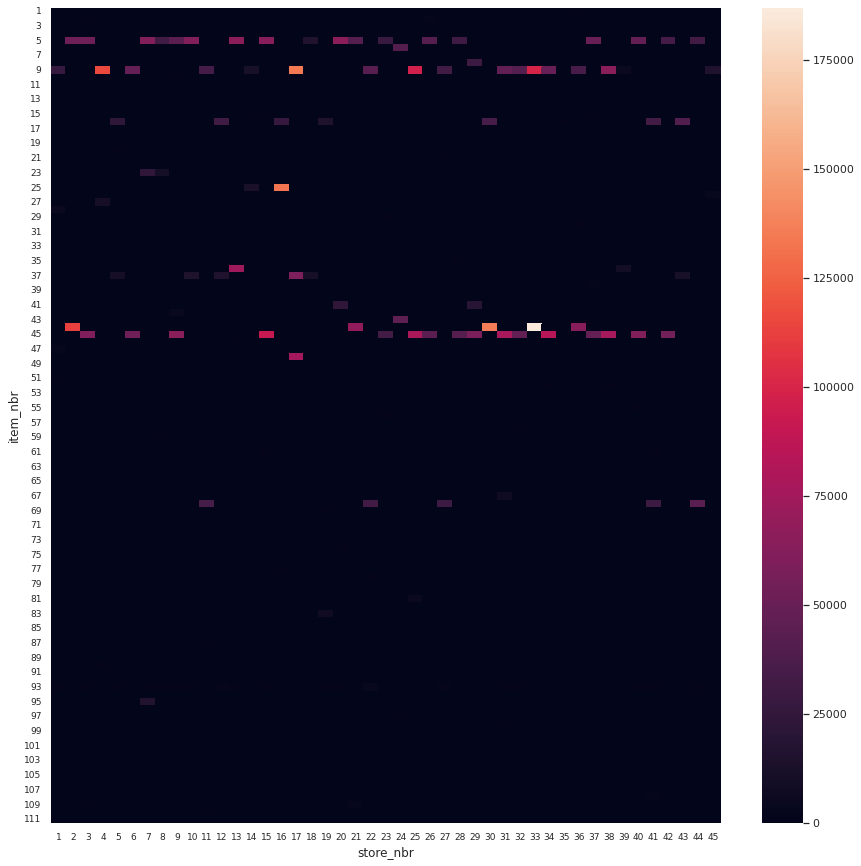

In [ ]:
# Visualizing frequently sold items 
# It seems commonly sold items among the 45 stores are 5, 9, 45 and 93.
units_sales = df_weather_store_train.pivot_table(index='item_nbr',columns='store_nbr',values='units',aggfunc=np.sum)
plt.figure(figsize=(15, 15))

sns.heatmap(units_sales)

plt.yticks(fontsize=9)
plt.xticks(fontsize=9)

plt.show()

In [ ]:
# Reviewing top 10 sales data in each data and store here
df_weather_store_train.nlargest(10, ['units'])

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,TSSN,BLSN,FZRA,UP,HZ,PRFG,BLDU,TSRA,DU,SN,FZDZ,VCTS,RA,BR,MIFG,SQ,SG,FZFG,FG+,BCFG,GR,VCFG,GS,FG,DZ,PL,TS,FU
1580533,2012-11-15,37,5,5568,13,44.0,24.0,34.0,1.738943,26.000000,31.000000,31.0,0.0,602.28058,1833.067038,0.014679,0.00,24.480000,30.38000,2.5,15.0,4.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3190033,2013-11-21,37,5,3369,13,28.0,11.0,20.0,1.738943,11.000000,14.000000,45.0,0.0,602.28058,1833.067038,0.014679,0.08,24.470000,30.44000,7.0,2.0,7.5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1488312,2012-10-28,16,25,577,2,51.0,47.0,49.0,3.000000,46.000000,48.000000,16.0,0.0,615.00000,1647.000000,0.000000,0.07,28.840000,29.91000,11.2,5.0,11.8,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3260078,2013-12-08,17,9,503,20,33.0,26.0,30.0,1.738943,46.225155,53.292375,35.0,0.0,602.28058,1833.067038,0.000000,0.00,28.770601,30.01562,1.4,27.0,2.8,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1070603,2012-08-05,33,9,476,3,96.0,73.0,85.0,1.000000,65.000000,71.000000,0.0,20.0,533.00000,1926.000000,0.000000,0.12,29.370000,30.06000,6.0,1.0,6.5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1205503,2012-09-01,33,44,469,3,99.0,77.0,88.0,10.000000,63.000000,71.000000,0.0,23.0,555.00000,1853.000000,0.000000,0.00,29.200000,29.89000,7.6,29.0,8.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1050658,2012-08-01,33,44,460,3,112.0,83.0,98.0,14.000000,63.000000,74.000000,0.0,33.0,530.00000,1930.000000,0.000000,0.00,29.050000,29.74000,6.2,18.0,8.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2287718,2013-04-09,17,9,460,20,82.0,68.0,75.0,1.738943,64.000000,67.000000,0.0,10.0,602.28058,1833.067038,0.000000,0.00,28.970000,29.66000,14.6,15.0,15.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1964743,2013-02-01,33,44,448,3,44.0,16.0,30.0,-8.000000,12.000000,24.000000,35.0,0.0,725.00000,1750.000000,0.000000,0.00,29.580000,30.36000,4.4,12.0,6.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
448039,2012-04-01,33,44,441,3,90.0,66.0,78.0,21.000000,63.000000,68.000000,0.0,13.0,610.00000,1844.000000,0.000000,0.00,28.890000,29.59000,16.5,17.0,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


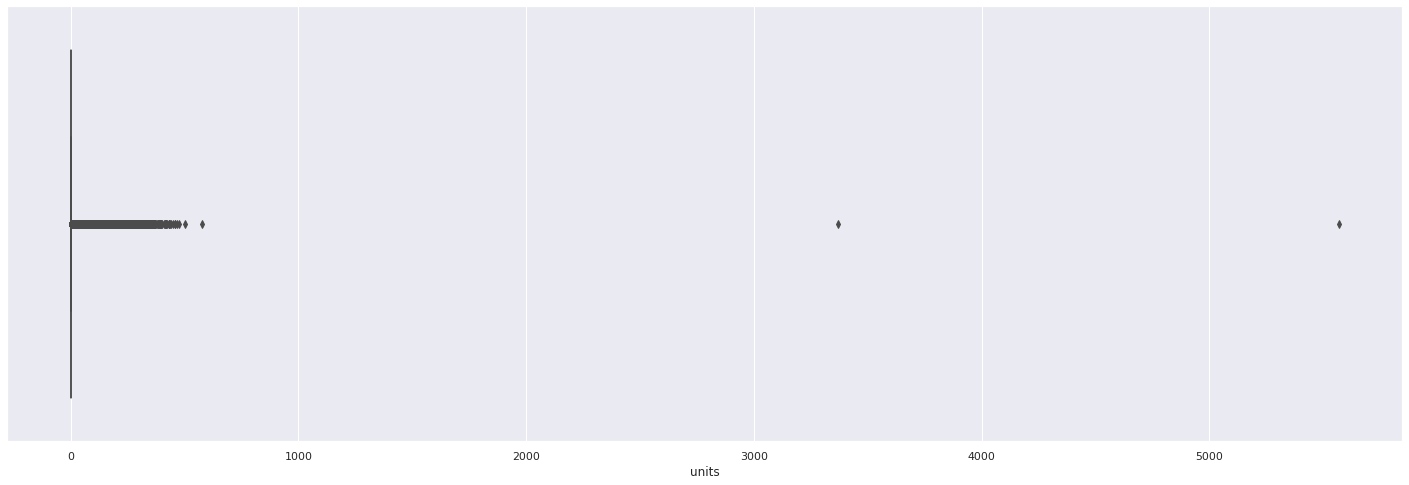

In [ ]:
# Visualizing Sales Unit Outlier data here
sns.boxplot(df_weather_store_train['units'])

In [ ]:
# Outlier Treatment with threshold 0.99 and 0.01 on sales unit here

upper_limit = df_weather_store_train['units'].quantile(0.99)
print('upper_limit:', upper_limit)

lower_limit = df_weather_store_train['units'].quantile(0.01)
print('lower_limit:', lower_limit)

df_train_final= df_weather_store_train[(df_weather_store_train['units'] <= upper_limit) & (df_weather_store_train['units'] >= lower_limit)]

df_train_final

upper_limit: 38.0
lower_limit: 0.0


,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,TSSN,BLSN,FZRA,UP,HZ,PRFG,BLDU,TSRA,DU,SN,FZDZ,VCTS,RA,BR,MIFG,SQ,SG,FZFG,FG+,BCFG,GR,VCFG,GS,FG,DZ,PL,TS,FU
0,2012-01-01,1,1,0,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,2012-01-01,1,2,0,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,2012-01-01,1,3,0,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,2012-01-01,1,4,0,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,2012-01-01,1,5,0,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617595,2014-10-31,45,107,0,16,53.0,34.0,44.0,1.738943,35.0,41.0,21.0,0.0,602.28058,1833.067038,0.014679,0.00,29.90,29.99,4.5,3.0,5.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4617596,2014-10-31,45,108,0,16,53.0,34.0,44.0,1.738943,35.0,41.0,21.0,0.0,602.28058,1833.067038,0.014679,0.00,29.90,29.99,4.5,3.0,5.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4617597,2014-10-31,45,109,0,16,53.0,34.0,44.0,1.738943,35.0,41.0,21.0,0.0,602.28058,1833.067038,0.014679,0.00,29.90,29.99,4.5,3.0,5.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4617598,2014-10-31,45,110,0,16,53.0,34.0,44.0,1.738943,35.0,41.0,21.0,0.0,602.28058,1833.067038,0.014679,0.00,29.90,29.99,4.5,3.0,5.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Reviewing data after outlier treatment here
df_train_final.nlargest(50, ['units'])

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,TSSN,BLSN,FZRA,UP,HZ,PRFG,BLDU,TSRA,DU,SN,FZDZ,VCTS,RA,BR,MIFG,SQ,SG,FZFG,FG+,BCFG,GR,VCFG,GS,FG,DZ,PL,TS,FU
781,2012-01-01,8,5,38,4,63.0,47.0,55.00000,4.000000,28.0,43.0,10.000000,0.000000,728.00000,1742.000000,0.000000,0.000,29.79,30.48,8.0,35.0,8.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16876,2012-01-04,21,5,38,3,63.0,31.0,47.00000,11.000000,26.0,37.0,18.000000,0.000000,735.00000,1722.000000,0.000000,0.000,29.53,30.27,2.5,31.0,4.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19995,2012-01-05,5,16,38,12,68.0,32.0,50.00000,1.738943,38.0,44.0,15.000000,0.000000,602.28058,1833.067038,0.000000,0.000,30.18,30.22,5.0,28.0,5.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21685,2012-01-05,20,41,38,7,66.0,28.0,47.00000,1.738943,29.0,40.0,18.000000,0.000000,602.28058,1833.067038,0.000000,0.000,28.71,30.13,12.2,20.0,12.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28309,2012-01-06,37,5,38,13,45.0,25.0,35.00000,1.738943,22.0,31.0,30.000000,0.000000,602.28058,1833.067038,0.014679,0.000,24.21,30.01,3.6,12.0,6.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33891,2012-01-07,43,37,38,11,73.0,42.0,58.00000,5.000000,48.0,51.0,7.000000,0.000000,725.00000,1742.000000,0.000000,0.001,30.10,30.15,2.0,27.0,2.3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
49958,2012-01-11,11,9,38,10,75.0,59.0,67.00000,1.738943,55.0,60.0,0.000000,2.000000,724.00000,1745.000000,0.014679,0.040,29.77,29.78,10.4,20.0,13.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51064,2012-01-11,21,5,38,3,61.0,29.0,45.00000,9.000000,30.0,36.0,20.000000,0.000000,735.00000,1728.000000,0.500000,0.020,29.08,29.79,9.5,32.0,12.1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52214,2012-01-11,31,45,38,17,62.0,24.0,43.00000,1.738943,27.0,35.0,22.000000,0.000000,602.28058,1833.067038,0.014679,0.020,29.15,29.82,5.7,33.0,5.9,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52769,2012-01-11,37,45,38,13,41.0,3.0,61.25934,1.738943,12.0,16.0,9.593728,5.853068,602.28058,1833.067038,0.014679,0.010,24.24,30.15,5.3,4.0,8.8,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Checking shape of the final data
df_train_final.shape

(4386606, 50)

In [ ]:
# Spliting the date into Year
df_train_final['year'] = df_train_final['date'].dt.year
# Spliting the date into Month
df_train_final['month'] = df_train_final['date'].dt.month
#Spliting the date into Week
df_train_final['week'] = df_train_final['date'].dt.week
# Spliting the date in Day
df_train_final['day'] = df_train_final['date'].dt.day


# Checking the date is weekday=0 or weekend=1
# monday = 0, tuesday = 1, wednesday=2, thrusday=3 friday=4, saturday=5, sunday = 6
# if the value < 5 then weekday=0 or weekend=1
df_train_final['weekday'] = np.where((df_train_final['date'].dt.dayofweek) < 5,0,1) 

<p>Though in data there no season specified, but to split the int group we are spliting them into 4 season

<li>SPRING :	 March - May</li>
<li>SUMMER :	 June - August</li>
<li>FALL :	September - November</li>
<li>WINTER :	December - February</li>
</p>

In [ ]:
# Custom function to split data into four season based on US calendar
def season_split(month):
    if (month >= 3 and month <= 5):
        return "SPRING"
    elif (month >= 6 and month <= 8):
        return "SUMMER"
    elif (month >=9 and month <= 11):
        return "FALL"
    else:
        return "WINTER" 

In [ ]:
# Applying the custom function and creating new season column in the existing dataframe here
df_train_final['season'] = df_train_final['month'].apply(season_split)

In [ ]:
# Checking total count is mactching with the dataset here
df_train_final['season'].value_counts()

SPRING    1176314
SUMMER    1122849
WINTER    1073639
FALL      1013804
Name: season, dtype: int64

In [ ]:
# Checking whether any column have null value here
df_train_final['season'].isna().sum()

0

In [ ]:
# Applying one hot encoding onseason data here
df_train_final = pd.get_dummies(df_train_final, columns=['season'])

In [ ]:
# Creating new feature from dates using USA holiday calendar and identifying holidays during the time frame
us_holidays = holidays.US()

df_train_final['is_holiday']= [1 if str(cat_holi).split()[0] in us_holidays else 0 for cat_holi in df_train_final['date']]

In [ ]:
# Checking how many days are holiday here
df_train_final['is_holiday'].value_counts()

0    4268146
1     118460
Name: is_holiday, dtype: int64

In [ ]:
df_train_final

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,TSSN,BLSN,FZRA,UP,HZ,PRFG,BLDU,TSRA,DU,SN,FZDZ,VCTS,RA,BR,MIFG,SQ,SG,FZFG,FG+,BCFG,GR,VCFG,GS,FG,DZ,PL,TS,FU,year,month,week,day,weekday,season_FALL,season_SPRING,season_SUMMER,season_WINTER,is_holiday
0,2012-01-01,1,1,0,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2012,1,52,1,1,0,0,0,1,1
1,2012-01-01,1,2,0,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2012,1,52,1,1,0,0,0,1,1
2,2012-01-01,1,3,0,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2012,1,52,1,1,0,0,0,1,1
3,2012-01-01,1,4,0,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2012,1,52,1,1,0,0,0,1,1
4,2012-01-01,1,5,0,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2012,1,52,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617595,2014-10-31,45,107,0,16,53.0,34.0,44.0,1.738943,35.0,41.0,21.0,0.0,602.28058,1833.067038,0.014679,0.00,29.90,29.99,4.5,3.0,5.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,10,44,31,0,1,0,0,0,0
4617596,2014-10-31,45,108,0,16,53.0,34.0,44.0,1.738943,35.0,41.0,21.0,0.0,602.28058,1833.067038,0.014679,0.00,29.90,29.99,4.5,3.0,5.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,10,44,31,0,1,0,0,0,0
4617597,2014-10-31,45,109,0,16,53.0,34.0,44.0,1.738943,35.0,41.0,21.0,0.0,602.28058,1833.067038,0.014679,0.00,29.90,29.99,4.5,3.0,5.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,10,44,31,0,1,0,0,0,0
4617598,2014-10-31,45,110,0,16,53.0,34.0,44.0,1.738943,35.0,41.0,21.0,0.0,602.28058,1833.067038,0.014679,0.00,29.90,29.99,4.5,3.0,5.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,10,44,31,0,1,0,0,0,0


In [ ]:
# Confirming datatype of the final merged data here
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4386606 entries, 0 to 4617599
Data columns (total 60 columns):
 #   Column         Dtype         
---  ------         -----         
 0   date           datetime64[ns]
 1   store_nbr      int64         
 2   item_nbr       int64         
 3   units          int64         
 4   station_nbr    int64         
 5   tmax           float64       
 6   tmin           float64       
 7   tavg           float64       
 8   depart         float64       
 9   dewpoint       float64       
 10  wetbulb        float64       
 11  heat           float64       
 12  cool           float64       
 13  sunrise        float64       
 14  sunset         float64       
 15  snowfall       float64       
 16  preciptotal    float64       
 17  stnpressure    float64       
 18  sealevel       float64       
 19  resultspeed    float64       
 20  resultdir      float64       
 21  avgspeed       float64       
 22  TSSN           int64         
 23  BLSN   

In [ ]:
# Confirming none of the rows have missing value here
df_train_final.isna().sum()

date             0
store_nbr        0
item_nbr         0
units            0
station_nbr      0
tmax             0
tmin             0
tavg             0
depart           0
dewpoint         0
wetbulb          0
heat             0
cool             0
sunrise          0
sunset           0
snowfall         0
preciptotal      0
stnpressure      0
sealevel         0
resultspeed      0
resultdir        0
avgspeed         0
TSSN             0
BLSN             0
FZRA             0
UP               0
HZ               0
PRFG             0
BLDU             0
TSRA             0
DU               0
SN               0
FZDZ             0
VCTS             0
RA               0
BR               0
MIFG             0
SQ               0
SG               0
FZFG             0
FG+              0
BCFG             0
GR               0
VCFG             0
GS               0
FG               0
DZ               0
PL               0
TS               0
FU               0
year             0
month            0
week        

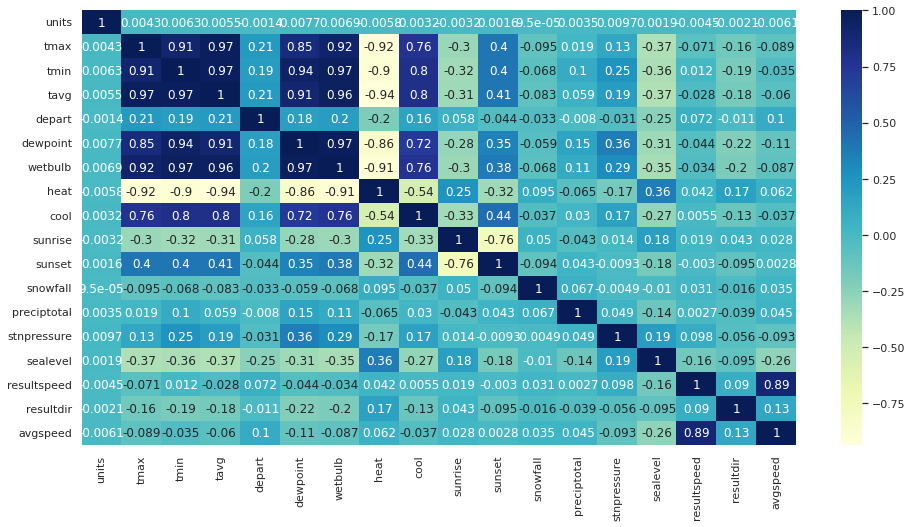

In [ ]:
# Reviewing co-realation between Sales-Units and Numeric Weather features
# But we observed we don't have any strong corealation with weather features

df_train_lst = ['units','tmax', 'tmin', 'tavg', 'depart', 'dewpoint','wetbulb', 'heat', 'cool', 'sunrise', 
            'sunset','snowfall','preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir','avgspeed']

df_train_final_corr = df_train_final[df_train_lst].corr()

sns.set(rc = {'figure.figsize':(16,8)})
dataplot = sns.heatmap(df_train_final_corr, cmap="YlGnBu", annot=True)

plt.show()

Firstly, We did the experiment with units and all numeric weather features but we didn’t get any good positive or negative relation among those variables which can help us to confirm weather features have any influence in sales.

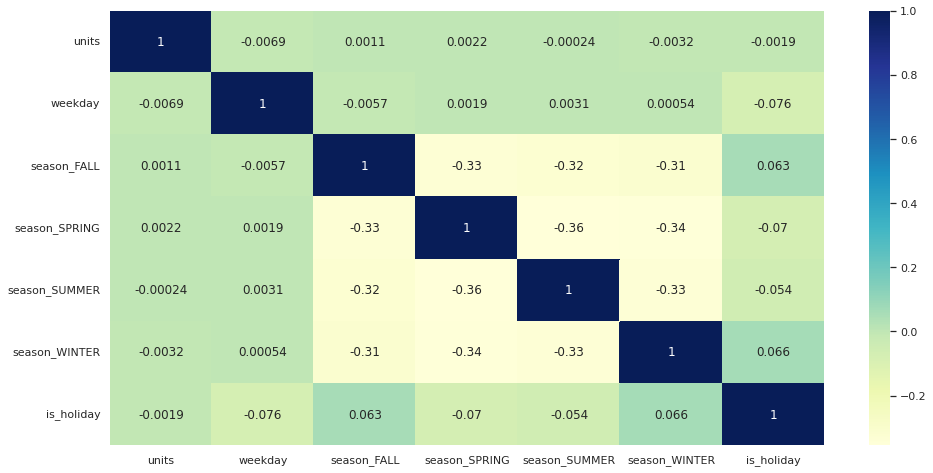

In [ ]:
# Corelation heatmap between sales unit holiday, weekday, season
# But we observed we don't have any strong corealation with holiday, weekday, season
df_train_fe = ["units","weekday","season_FALL","season_SPRING","season_SUMMER","season_WINTER","is_holiday"]
df_train_fe_corr = df_train_final[df_train_fe].corr()

sns.set(rc = {'figure.figsize':(16,8)})
dataplot = sns.heatmap(df_train_fe_corr, cmap="YlGnBu", annot=True)

plt.show()

Secondly, We tried to do the experiment on newly created features like ‘season’, ‘weekday’ and ‘is_holiday’. But we were not able to make a conclusion due to poor correlation value among units and these features.


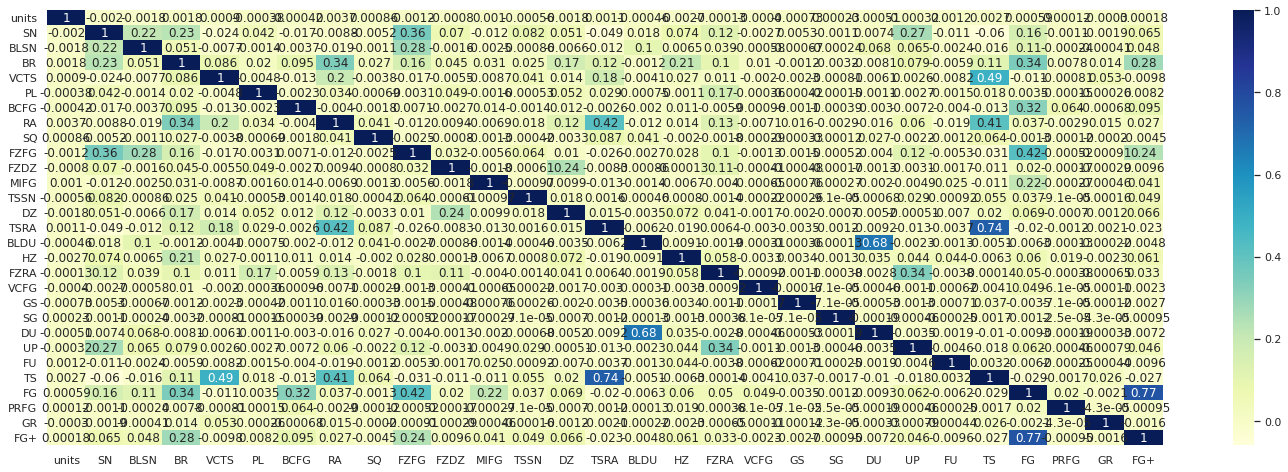

In [ ]:
# Corelation heatmap between sales unit and codesum features
# But we observed we don't have any strong corealation with codesum features
df_train_codesumx = ["units","SN", "BLSN" ,"BR", "VCTS", "PL", "BCFG", "RA", "SQ" , "FZFG", "FZDZ", "MIFG", "TSSN", "DZ", "TSRA", "BLDU", "HZ", "FZRA", "VCFG", "GS", "SG", "DU", "UP", "FU", "TS", "FG", "PRFG", "GR", "FG+"]
df_train_fe1_corr = df_train_final[df_train_codesumx].corr()

sns.set(rc = {'figure.figsize':(25,8)})
dataplot = sns.heatmap(df_train_fe1_corr, cmap="YlGnBu", annot=True)

plt.show()

Lastly, we tried the same on ‘codesum’ categorical weather features but here also the result was disappointing.

In [ ]:
# Storing Final Processed data
df_train_final.to_csv("/gdrive/MyDrive/Project_52/final.csv",index=False)

<h3> Feature Importance Analysis with Random Forest Regressor</h3>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=0)

In [ ]:
df_train_merged = df_train_final

Feature ranking:
1. feature 12 stnpressure (0.139688)
2. feature 14 resultspeed (0.095264)
3. feature 16 avgspeed (0.092365)
4. feature 13 sealevel (0.084087)
5. feature 15 resultdir (0.077250)
6. feature 0 tmax (0.066300)
7. feature 4 dewpoint (0.065773)
8. feature 1 tmin (0.064474)
9. feature 8 sunrise (0.058160)
10. feature 9 sunset (0.055915)
11. feature 5 wetbulb (0.045333)
12. feature 11 preciptotal (0.040458)
13. feature 3 depart (0.037017)
14. feature 2 tavg (0.033834)
15. feature 7 cool (0.016998)
16. feature 6 heat (0.016835)
17. feature 10 snowfall (0.010249)


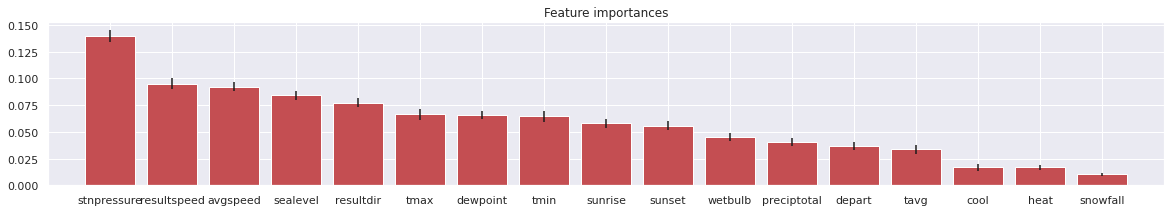

In [ ]:
#using only numeric weather feature
dfX = df_train_merged.filter(weatherx)
dfy = df_train_merged.filter(['units'])
model.fit(dfX, dfy)

#print(model.feature_importances_)
importances = model.feature_importances_

std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

fr = dfX.columns[np.argsort(model.feature_importances_)[::-1]].values.tolist()

print("Feature ranking:")

for f in range(dfX.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], fr[f], importances[indices[f]]))
    
plt.figure(figsize=(20, 3))

plt.title("Feature importances")

plt.bar(range(dfX.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")

plt.xticks(range(dfX.shape[1]), fr)

plt.xlim([-1, dfX.shape[1]])

plt.show()

Feature ranking:
1. feature 2 BR (0.098802)
2. feature 6 RA (0.089300)
3. feature 15 HZ (0.077680)
4. feature 23 TS (0.075140)
5. feature 0 SN (0.068978)
6. feature 27 FG+ (0.065413)
7. feature 24 FG (0.057685)
8. feature 21 UP (0.055725)
9. feature 12 DZ (0.055253)
10. feature 8 FZFG (0.040784)
11. feature 16 FZRA (0.039807)
12. feature 22 FU (0.034445)
13. feature 3 VCTS (0.034231)
14. feature 10 MIFG (0.033892)
15. feature 13 TSRA (0.027785)
16. feature 5 BCFG (0.027070)
17. feature 1 BLSN (0.023661)
18. feature 4 PL (0.022195)
19. feature 9 FZDZ (0.015180)
20. feature 14 BLDU (0.014414)
21. feature 20 DU (0.013160)
22. feature 7 SQ (0.009400)
23. feature 18 GS (0.007266)
24. feature 19 SG (0.003355)
25. feature 17 VCFG (0.003315)
26. feature 11 TSSN (0.003025)
27. feature 25 PRFG (0.001708)
28. feature 26 GR (0.001330)


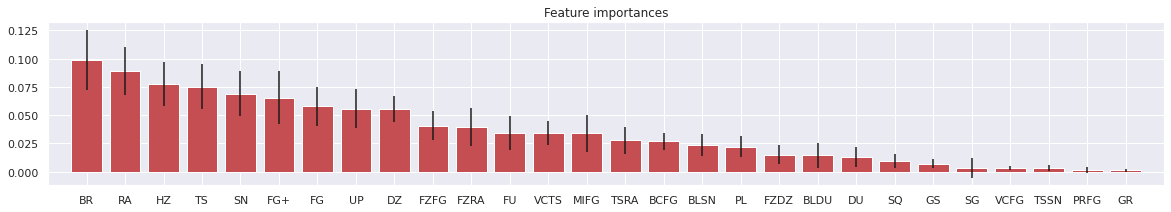

In [ ]:
# Using only codesum one hot encoded data
df_train_codesumw = ["SN", "BLSN" ,"BR", "VCTS", "PL", "BCFG", "RA", "SQ" , "FZFG", "FZDZ", "MIFG", "TSSN", "DZ", "TSRA", "BLDU", "HZ", "FZRA", "VCFG", "GS", "SG", "DU", "UP", "FU", "TS", "FG", "PRFG", "GR", "FG+"]

dfX = df_train_merged.filter(df_train_codesumw)
dfy = df_train_merged.filter(['units'])

model.fit(dfX, dfy)

#print(model.feature_importances_)

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

fr = dfX.columns[np.argsort(model.feature_importances_)[::-1]].values.tolist()
print("Feature ranking:")

for f in range(dfX.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], fr[f], importances[indices[f]]))
    
plt.figure(figsize=(20, 3))

plt.title("Feature importances")

plt.bar(range(dfX.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")

plt.xticks(range(dfX.shape[1]), fr)

plt.xlim([-1, dfX.shape[1]])

plt.show()

Feature ranking:
1. feature 0 weekday (0.654124)
2. feature 4 season_WINTER (0.128410)
3. feature 5 is_holiday (0.095646)
4. feature 2 season_SPRING (0.064796)
5. feature 3 season_SUMMER (0.035434)
6. feature 1 season_FALL (0.021590)


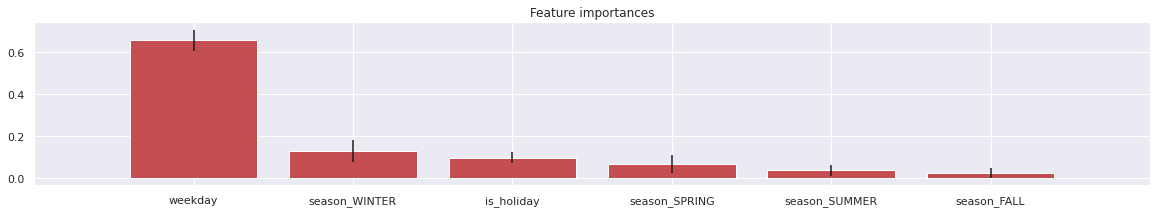

In [ ]:
# Using only newly created features
df_train_fex = ["weekday","season_FALL","season_SPRING","season_SUMMER","season_WINTER","is_holiday"]

dfX = df_train_merged.filter(df_train_fex)
dfy = df_train_merged.filter(['units'])

model.fit(dfX, dfy)

#print(model.feature_importances_)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

fr = dfX.columns[np.argsort(model.feature_importances_)[::-1]].values.tolist()
print("Feature ranking:")

for f in range(dfX.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], fr[f], importances[indices[f]]))
    
plt.figure(figsize=(20, 3))

plt.title("Feature importances")

plt.bar(range(dfX.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")

plt.xticks(range(dfX.shape[1]), fr)

plt.xlim([-1, dfX.shape[1]])

plt.show()

<h3> Univariate feature selection with K-Best</h3>

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
# Using only newly created features
dfX = df_train_merged.filter(df_train_fex)
dfy = df_train_merged.filter(['units'])

best_features = SelectKBest(score_func=f_regression, k=6)
fits = best_features.fit(dfX,dfy)

df_score = pd.DataFrame(fits.scores_)
df_columns = pd.DataFrame(dfX.columns)

feature_score = pd.concat([df_columns,df_score],axis=1)
feature_score.columns = ['feature', 'score']

feature_score.sort_values('score',ascending=False)

,feature,score
0,weekday,209.516870
4,season_WINTER,43.808746
2,season_SPRING,22.191264
5,is_holiday,15.500348
1,season_FALL,5.362978
3,season_SUMMER,0.248159


In [ ]:
# using only numeric weather feature
dfX = df_train_merged.filter(weatherx)
dfy = df_train_merged.filter(['units'])

best_features=SelectKBest(score_func=f_regression, k=17)
fits= best_features.fit(dfX,dfy)

df_score = pd.DataFrame(fits.scores_)
df_columns=pd.DataFrame(dfX.columns)

feature_score=pd.concat([df_columns,df_score],axis=1)

feature_score.columns=['feature', 'score']

feature_score.sort_values('score',ascending=False)

,feature,score
12,stnpressure,416.159077
4,dewpoint,260.544987
5,wetbulb,208.531161
1,tmin,174.257930
16,avgspeed,162.293988
6,heat,148.254012
2,tavg,131.790489
14,resultspeed,88.570967
0,tmax,80.562451
11,preciptotal,55.206400


In [ ]:
# Using only codesum one hot encoded data
df_train_codesumw = ["SN", "BLSN" ,"BR", "VCTS", "PL", "BCFG", "RA", "SQ" , "FZFG", "FZDZ", "MIFG", "TSSN", "DZ", "TSRA", "BLDU", "HZ", "FZRA", "VCFG", "GS", "SG", "DU", "UP", "FU", "TS", "FG", "PRFG", "GR", "FG+"]

dfX = df_train_merged.filter(df_train_codesumw)
dfy = df_train_merged.filter(['units'])

best_features=SelectKBest(score_func=f_regression, k=27)
fits= best_features.fit(dfX,dfy)

df_score = pd.DataFrame(fits.scores_)
df_columns=pd.DataFrame(dfX.columns)

feature_score=pd.concat([df_columns,df_score],axis=1)

feature_score.columns=['feature', 'score']

feature_score.sort_values('score',ascending=False)

,feature,score
6,RA,59.115177
15,HZ,32.453322
23,TS,30.894793
0,SN,16.690829
2,BR,14.903039
1,BLSN,14.341022
12,DZ,13.553518
22,FU,6.261660
8,FZFG,6.138983
13,TSRA,4.897661


<h1><u>Phase-3: Modeling and Error Analysis</u></h1>

#### Importing all standard libaries for Modeling and Error Analysis:

In [53]:
# Sklearn Libary for Scaling
from sklearn.preprocessing import StandardScaler

# Sklearn Libary for Train-Test split
from sklearn.model_selection import train_test_split

# Sklearn Libary for Classification Model
from sklearn.linear_model import LogisticRegression


# Sklearn Libary for Regression modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso

#Light GBM Regression Model
from lightgbm import LGBMRegressor


# Sklearn Libary for Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# Sklearn Libary for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV


# Sklearn Libary for Error metric
from sklearn.metrics import mean_squared_error, mean_squared_log_error,r2_score,SCORERS  # Regression
from sklearn.metrics import f1_score,roc_auc_score # Classification
from sklearn import metrics

from scipy.stats import loguniform

In [ ]:
df_train_final = pd.read_csv('/gdrive/MyDrive/Project_52/final.csv')
df_train_final

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,TSSN,BLSN,FZRA,UP,HZ,PRFG,BLDU,TSRA,DU,SN,FZDZ,VCTS,RA,BR,MIFG,SQ,SG,FZFG,FG+,BCFG,GR,VCFG,GS,FG,DZ,PL,TS,FU,year,month,week,day,weekday,season_FALL,season_SPRING,season_SUMMER,season_WINTER,is_holiday
0,2012-01-01,1,1,0,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2012,1,52,1,1,0,0,0,1,1
1,2012-01-01,1,2,0,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2012,1,52,1,1,0,0,0,1,1
2,2012-01-01,1,3,0,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2012,1,52,1,1,0,0,0,1,1
3,2012-01-01,1,4,0,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2012,1,52,1,1,0,0,0,1,1
4,2012-01-01,1,5,0,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2012,1,52,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4386601,2014-10-31,45,107,0,16,53.0,34.0,44.0,1.738943,35.0,41.0,21.0,0.0,602.28058,1833.067038,0.014679,0.00,29.90,29.99,4.5,3.0,5.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,10,44,31,0,1,0,0,0,0
4386602,2014-10-31,45,108,0,16,53.0,34.0,44.0,1.738943,35.0,41.0,21.0,0.0,602.28058,1833.067038,0.014679,0.00,29.90,29.99,4.5,3.0,5.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,10,44,31,0,1,0,0,0,0
4386603,2014-10-31,45,109,0,16,53.0,34.0,44.0,1.738943,35.0,41.0,21.0,0.0,602.28058,1833.067038,0.014679,0.00,29.90,29.99,4.5,3.0,5.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,10,44,31,0,1,0,0,0,0
4386604,2014-10-31,45,110,0,16,53.0,34.0,44.0,1.738943,35.0,41.0,21.0,0.0,602.28058,1833.067038,0.014679,0.00,29.90,29.99,4.5,3.0,5.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,10,44,31,0,1,0,0,0,0


<h4> As we already identified through EDA and different feature analysis techniques our data set is time series format, but our dataset is highly imbalanced where 97% sales units are zero. Hence, we are not getting good results with the time series method.<br/>
 

So, we decided to go ahead with classical machine models.<br/>
 

Since our data is highly imbalanced initially, we decided to delete all zero sales records but later realized if we directly delete all zero sales records in case the model sees a new data point in future with zero sales record it may not be able to predict the sales units accurately.<br/>
 

So, we decided to introduce a wrapper Classification model before feeding the original regression model to overcome this challenge. If, in future if the model saw an unknown query point which has zero sales it is able to predict it correctly.<br/>
 

First, we created a new feature in the final dataset which will help us to identify whether sales happened or not on the record.<br/>
 

If Sales Unit > 0 then ‘isSales' =1
If Sales Unit = 0 then ‘isSales' =0

<br/>
Then, we used this new variable 'isSales' as our target variable and sales ‘units’ and other columns as our feature to predict if the sales will happen or not.
</h4>

In [ ]:
# We are creating a few feature which will store the information whether we have sales > zero or not
# If sales> 0 isSales=1 and sales = 0 then isSales=0

df_train_final['isSales'] = np.where((df_train_final['units']) == 0,0,1)
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4386606 entries, 0 to 4386605
Data columns (total 61 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           object 
 1   store_nbr      int64  
 2   item_nbr       int64  
 3   units          int64  
 4   station_nbr    int64  
 5   tmax           float64
 6   tmin           float64
 7   tavg           float64
 8   depart         float64
 9   dewpoint       float64
 10  wetbulb        float64
 11  heat           float64
 12  cool           float64
 13  sunrise        float64
 14  sunset         float64
 15  snowfall       float64
 16  preciptotal    float64
 17  stnpressure    float64
 18  sealevel       float64
 19  resultspeed    float64
 20  resultdir      float64
 21  avgspeed       float64
 22  TSSN           int64  
 23  BLSN           int64  
 24  FZRA           int64  
 25  UP             int64  
 26  HZ             int64  
 27  PRFG           int64  
 28  BLDU           int64  
 29  TSRA          

#### Using this newly created 'isSales' feature we will create a wrapper model below using Classification Technique

In [ ]:
final_feature= ["store_nbr","item_nbr","station_nbr","tmax","tmin","tavg","depart","dewpoint","wetbulb","heat","cool",
                 "sunrise","sunset","snowfall","preciptotal","stnpressure","sealevel","resultspeed","resultdir","avgspeed",
                 "PL","VCFG","VCTS","BCFG","UP","FZDZ","SQ","TS","FG","BLDU","GS","GR","TSSN","TSRA","BLSN","FZFG",
                 "DU","DZ","FG+","BR","HZ","FU","MIFG","SG","RA","SN","PRFG","FZRA","year","month","week","day",
                 "weekday","season_FALL","season_SPRING","season_SUMMER","season_WINTER","is_holiday","units"]

# define dataset feature and target
X = df_train_final.filter(final_feature)
y = df_train_final.filter(['isSales'])

#Spliting dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=None, shuffle=False, train_size=0.70)

x_tst_dum=X_test.copy()
x_train_dum=X_train.copy()

# Scaling the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3070624, 59) (1315982, 59) (3070624, 1) (1315982, 1)


#### Logistic Regression: Classification Model to predict Sales happen or not.

In [ ]:
# Wrapper Model to check sales prediction working properly.
model = LogisticRegression(penalty='none')

model.fit(X_train, y_train)

y_pred_train =model.predict(X_train)
y_pred_test =model.predict(X_test)

# F1 Score
print("F1 Score on Train Data: ",f1_score(y_train, y_pred_train, average=None))
print("F1 Score on Test Data: ",f1_score(y_test, y_pred_test, average=None))

# AUC-ROC Score
print("ROC-AUC Score on Train Data: ",roc_auc_score(y_train, y_pred_train))
print("ROC-AUC Score on Test Data: ",roc_auc_score(y_test, y_pred_test))

F1 Score on Train Data:  [1. 1.]
F1 Score on Test Data:  [1. 1.]
ROC-AUC Score on Train Data:  1.0
ROC-AUC Score on Test Data:  1.0


#### Error Analysis of the classification model

#### We have plotted the Area under the curve score below, and can see AUC=1.0 which is considered to be the best score.

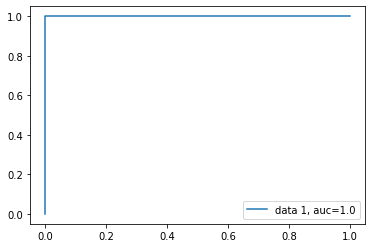

In [ ]:
# Plot ROC-AUC Score
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.legend(loc=4)

plt.show()

#### Cross Validation and Hyperparameter tuning for Classification Model

In [ ]:
# Wrapper Model to check sales prediction working properly.
model = LogisticRegression()

# Define evaluation
cv = KFold(n_splits=3, shuffle=False)

# Define search space
space = dict()
space['solver'] = ['lbfgs', 'liblinear']
space['penalty'] = ['none', 'l2']

# Define search
search = RandomizedSearchCV(model, space, n_iter=5, scoring='f1', n_jobs=-1, cv=cv, random_state=1)

# Execute search
result = search.fit(X_train, y_train)

# Summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 1.0
Best Hyperparameters: {'solver': 'lbfgs', 'penalty': 'l2'}


#### Storing the index which classification model predicted sales true

In [ ]:
# Storing the index Test data which classification model predicted sales true
test_index = x_tst_dum.first_valid_index()
isSales_test = []

for localIdx1 in range(y_test.shape[0]):
    if y_pred_test[localIdx1] == 1:
        isSales_test.append(test_index + localIdx1)


#print(isSales_test)

df_test_sales_nonzero = df_train_final.loc[isSales_test]

print(df_test_sales_nonzero.shape)

df_test_sales_nonzero.head(5)

(20848, 61)


,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,TSSN,BLSN,FZRA,UP,HZ,PRFG,BLDU,TSRA,DU,SN,FZDZ,VCTS,RA,BR,MIFG,SQ,SG,FZFG,FG+,BCFG,GR,VCFG,GS,FG,DZ,PL,TS,FU,year,month,week,day,weekday,season_FALL,season_SPRING,season_SUMMER,season_WINTER,is_holiday,isSales
3070650,2013-11-29,18,5,2,17,58.0,24.0,41.0,1.738943,25.0,35.0,24.0,0.0,602.28058,1833.067038,0.0,0.0,29.70,30.41,4.5,17.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013,11,48,29,0,1,0,0,0,0,1
3070682,2013-11-29,18,37,6,17,58.0,24.0,41.0,1.738943,25.0,35.0,24.0,0.0,602.28058,1833.067038,0.0,0.0,29.70,30.41,4.5,17.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013,11,48,29,0,1,0,0,0,0,1
3070717,2013-11-29,18,72,1,17,58.0,24.0,41.0,1.738943,25.0,35.0,24.0,0.0,602.28058,1833.067038,0.0,0.0,29.70,30.41,4.5,17.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013,11,48,29,0,1,0,0,0,0,1
3070796,2013-11-29,20,41,15,7,58.0,28.0,43.0,1.738943,26.0,36.0,22.0,0.0,602.28058,1833.067038,0.0,0.0,28.92,30.34,13.3,18.0,13.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013,11,48,29,0,1,0,0,0,0,1
3070871,2013-11-29,21,5,21,3,56.0,25.0,41.0,-3.000000,23.0,35.0,24.0,0.0,714.00000,1710.000000,0.0,0.0,29.64,30.39,8.3,16.0,8.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013,11,48,29,0,1,0,0,0,0,1


In [ ]:
# Storing the index Train data which classification model predicted sales true
train_index = x_train_dum.first_valid_index()
isSales_train = []

for localIdx2 in range(y_train.shape[0]):
    if y_pred_train[localIdx2] == 1:
        isSales_train.append(train_index + localIdx2)


#print(isSales_train)
df_train_sales_nonzero = df_train_final.loc[isSales_train]
print(df_train_sales_nonzero.shape)

df_train_sales_nonzero.head(5)

(49272, 61)


,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,TSSN,BLSN,FZRA,UP,HZ,PRFG,BLDU,TSRA,DU,SN,FZDZ,VCTS,RA,BR,MIFG,SQ,SG,FZFG,FG+,BCFG,GR,VCFG,GS,FG,DZ,PL,TS,FU,year,month,week,day,weekday,season_FALL,season_SPRING,season_SUMMER,season_WINTER,is_holiday,isSales
8,2012-01-01,1,9,29,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2012,1,52,1,1,0,0,0,1,1,1
27,2012-01-01,1,28,2,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2012,1,52,1,1,0,0,0,1,1,1
50,2012-01-01,1,51,1,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2012,1,52,1,1,0,0,0,1,1,1
344,2012-01-01,5,16,24,12,72.0,48.0,60.0,1.738943,54.0,57.0,5.0,0.0,602.28058,1833.067038,0.000000,0.00,30.15,30.19,4.4,25.0,4.8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2012,1,52,1,1,0,0,0,1,1,1
360,2012-01-01,5,32,1,12,72.0,48.0,60.0,1.738943,54.0,57.0,5.0,0.0,602.28058,1833.067038,0.000000,0.00,30.15,30.19,4.4,25.0,4.8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2012,1,52,1,1,0,0,0,1,1,1


In [ ]:
# Merging both train and test dataset which have sales greater than zero

frames = [df_train_sales_nonzero, df_test_sales_nonzero]
df_sales_nonzero_final = pd.concat(frames)
df_sales_nonzero_final

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,TSSN,BLSN,FZRA,UP,HZ,PRFG,BLDU,TSRA,DU,SN,FZDZ,VCTS,RA,BR,MIFG,SQ,SG,FZFG,FG+,BCFG,GR,VCFG,GS,FG,DZ,PL,TS,FU,year,month,week,day,weekday,season_FALL,season_SPRING,season_SUMMER,season_WINTER,is_holiday,isSales
8,2012-01-01,1,9,29,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2012,1,52,1,1,0,0,0,1,1,1
27,2012-01-01,1,28,2,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2012,1,52,1,1,0,0,0,1,1,1
50,2012-01-01,1,51,1,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2012,1,52,1,1,0,0,0,1,1,1
344,2012-01-01,5,16,24,12,72.0,48.0,60.0,1.738943,54.0,57.0,5.0,0.0,602.28058,1833.067038,0.000000,0.00,30.15,30.19,4.4,25.0,4.8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2012,1,52,1,1,0,0,0,1,1,1
360,2012-01-01,5,32,1,12,72.0,48.0,60.0,1.738943,54.0,57.0,5.0,0.0,602.28058,1833.067038,0.000000,0.00,30.15,30.19,4.4,25.0,4.8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2012,1,52,1,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4386311,2014-10-31,43,37,8,11,75.0,50.0,63.0,-2.000000,53.0,57.0,2.0,0.0,640.00000,1740.000000,0.000000,0.00,29.82,29.85,5.3,30.0,6.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,10,44,31,0,1,0,0,0,0,1
4386347,2014-10-31,43,73,1,11,75.0,50.0,63.0,-2.000000,53.0,57.0,2.0,0.0,640.00000,1740.000000,0.000000,0.00,29.82,29.85,5.3,30.0,6.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,10,44,31,0,1,0,0,0,0,1
4386477,2014-10-31,44,94,1,12,75.0,60.0,68.0,1.738943,53.0,59.0,0.0,3.0,602.28058,1833.067038,0.000000,0.00,29.80,29.85,7.0,32.0,7.5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,10,44,31,0,1,0,0,0,0,1
4386503,2014-10-31,45,9,10,16,53.0,34.0,44.0,1.738943,35.0,41.0,21.0,0.0,602.28058,1833.067038,0.014679,0.00,29.90,29.99,4.5,3.0,5.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,10,44,31,0,1,0,0,0,0,1


#### Base Model

#### Preparing the Regression model to predict the sales with only records where isSales=1 

#### Random Forest Regressor: With all features.

In [ ]:
# Final feature for the regression model to predict the sales.
sales_features= ["store_nbr","item_nbr","station_nbr","tmax","tmin","tavg","depart","dewpoint","wetbulb","heat","cool",
                 "sunrise","sunset","snowfall","preciptotal","stnpressure","sealevel","resultspeed","resultdir","avgspeed",
                 "PL","VCFG","VCTS","BCFG","UP","FZDZ","SQ","TS","FG","BLDU","GS","GR","TSSN","TSRA","BLSN","FZFG",
                 "DU","DZ","FG+","BR","HZ","FU","MIFG","SG","RA","SN","PRFG","FZRA","year","month","week","day",
                 "weekday","season_FALL","season_SPRING","season_SUMMER","season_WINTER","is_holiday","isSales"]


# define dataset feature and target
Xr = df_sales_nonzero_final.filter(sales_features)
yr = df_sales_nonzero_final.filter(['units'])

#Spliting dataset into Train and Test
X_trainr, X_testr, y_trainr, y_testr = train_test_split(Xr, yr, random_state=1, stratify=None, shuffle=False,train_size=0.70)

# Scaling the dataset
sc = StandardScaler()
X_trainr = sc.fit_transform(X_trainr)
X_testr = sc.transform (X_testr)


print(X_trainr.shape, X_testr.shape, y_trainr.shape, y_testr.shape)

# calling the model
model_rfr = RandomForestRegressor(random_state=1, n_estimators=500, max_features=6)

# fitting the model
model_rfr.fit(X_trainr, y_trainr)
y_predr =model_rfr.predict(X_testr)

print("Random Forest Regressor : Error Metric")
# model error score- r^2 
r2x = r2_score(y_testr, y_predr)
print("R^2 error : ",r2x)


# model error score- rmse 
rmse = math.sqrt(mean_squared_error(y_testr, y_predr))
print("Root mean squared error (RMSE): ",rmse)


# model error score- rmsle 
rmsle = math.sqrt(mean_squared_log_error(y_testr, y_predr))
print("Root mean squared log error (RMSLE): ",rmsle)

(49084, 59) (21036, 59) (49084, 1) (21036, 1)
Random Forest Regressor : Error Metric
R^2 error :  0.5003348772274453
Root mean squared error (RMSE):  8.239448217743526
Root mean squared log error (RMSLE):  0.7490949911841623


#### Random Forest Regressor feature importance

In [ ]:
importances = model_rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rfr.estimators_], axis=0)

indices = np.argsort(importances)[::-1]

fr = Xr.columns[np.argsort(model_rfr.feature_importances_)[::-1]].values.tolist()
print("Random Forest Feature ranking:")

for f in range(Xr.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], fr[f], importances[indices[f]]))

Random Forest Feature ranking:
1. feature 1 item_nbr (0.490883)
2. feature 0 store_nbr (0.099573)
3. feature 15 stnpressure (0.032785)
4. feature 2 station_nbr (0.026597)
5. feature 19 avgspeed (0.022875)
6. feature 17 resultspeed (0.022821)
7. feature 16 sealevel (0.022007)
8. feature 51 day (0.020397)
9. feature 7 dewpoint (0.020143)
10. feature 3 tmax (0.020116)
11. feature 4 tmin (0.019996)
12. feature 18 resultdir (0.019239)
13. feature 5 tavg (0.018630)
14. feature 8 wetbulb (0.018585)
15. feature 50 week (0.017390)
16. feature 11 sunrise (0.015383)
17. feature 12 sunset (0.015082)
18. feature 9 heat (0.010985)
19. feature 6 depart (0.010478)
20. feature 10 cool (0.010414)
21. feature 14 preciptotal (0.010375)
22. feature 49 month (0.009741)
23. feature 13 snowfall (0.006613)
24. feature 48 year (0.005941)
25. feature 52 weekday (0.005669)
26. feature 39 BR (0.003511)
27. feature 44 RA (0.003133)
28. feature 54 season_SPRING (0.002278)
29. feature 53 season_FALL (0.002265)
30. fe

<u>Feature Elimination</u>: 
<br/>
As a next step we tried to improve error score using Feature Elimination Technique. 
<br/>
<li>	We have removed all 'codesum' features since it has very low score in feature importance.</li>
<li>	We have removed 'Season' features since it has very low score in feature importance.</li>
<li>	During EDA we observed temperature feature have high co relation hence we kept only 'tmax' and 'cool' and removed 'tavg', 'tmin', 'heat'</li>
<li>	'isSales' also not required now as it is created on target variable hence we discarded it as well.</li>
<li>	We can observe much better result removing the features which have very low feature importance. </li>
<br/>
Again, fitting into the model, we got much better score this time.


In [ ]:
sales_features_updated= ["store_nbr","item_nbr","station_nbr","tmax","depart","dewpoint","wetbulb","cool",
                 "sunrise","sunset","snowfall","preciptotal","stnpressure","sealevel","resultspeed","resultdir","avgspeed",
                 "year","month","week","day","weekday","is_holiday"]

# define dataset feature and target
Xr = df_sales_nonzero_final.filter(sales_features_updated)
yr = df_sales_nonzero_final.filter(['units'])

#Spliting dataset into Train and Test
X_trainr, X_testr, y_trainr, y_testr = train_test_split(Xr, yr, random_state=1, stratify=None, shuffle=False,train_size=0.70)
X_testr_dum = X_testr.copy()

# Scaling the dataset
sc = StandardScaler()

X_trainr = sc.fit_transform(X_trainr)
X_testr = sc.transform (X_testr)

print(X_trainr.shape, X_testr.shape, y_trainr.shape, y_testr.shape)

# calling the model
model_rfr = RandomForestRegressor(random_state=1, n_estimators=500, max_features=6)

# fitting the model
model_rfr.fit(X_trainr, y_trainr)
y_predr = model_rfr.predict(X_testr)

print("Random Forest Regressor : Error Metric")

# model error score- r^2 
r2x = r2_score(y_testr, y_predr)
print("R^2 error : ",r2x)

# model error score- rmse 
rmse = math.sqrt(mean_squared_error(y_testr, y_predr))
print("Root mean squared error (RMSE): ",rmse)

# model error score- rmsle 
rmsle = math.sqrt(mean_squared_log_error(y_testr, y_predr))
print("Root mean squared log error (RMSLE): ",rmsle)

(49084, 23) (21036, 23) (49084, 1) (21036, 1)
Random Forest Regressor : Error Metric
R^2 error :  0.6433242135758058
Root mean squared error (RMSE):  6.961381332445021
Root mean squared log error (RMSLE):  0.5733783826300545


#### Error ploting of the Random forest model using hyperparameter tuning on n_estimator

#### By plotting train and test score along with hyperparameter tuning on n_estimator we observed that the model is overfitted

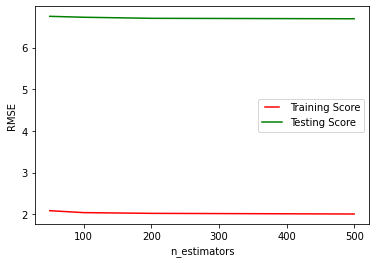

In [ ]:
train_results = []
test_results = []
list_nb_trees = [50, 100, 200, 500]

for nb_trees in list_nb_trees:
    model_rfr = RandomForestRegressor(n_estimators=nb_trees)
    model_rfr.fit(X_trainr, y_trainr)

    train_results.append(math.sqrt(mean_squared_error(y_trainr, model_rfr.predict(X_trainr))))
    test_results.append(math.sqrt(mean_squared_error(y_testr, model_rfr.predict(X_testr))))

line1, = plt.plot(list_nb_trees, train_results, color="r", label="Training Score")
line2, = plt.plot(list_nb_trees, test_results, color="g", label="Testing Score")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('RMSE')

plt.xlabel('n_estimators')

plt.show()

#### Feature Elimination : Using top 10 features based on Feature importance score

#### We observed that error score is improved slightly, but not significant change.

In [ ]:
sales_features_top10= ["item_nbr","store_nbr", "stnpressure","station_nbr","avgspeed","resultspeed","sealevel","day","dewpoint", "tmax"]

# define dataset feature and target
Xr = df_sales_nonzero_final.filter(sales_features_top10)
yr = df_sales_nonzero_final.filter(['units'])

#Spliting dataset into Train and Test
X_trainr, X_testr, y_trainr, y_testr = train_test_split(Xr, yr, random_state=1, stratify=None, shuffle=False,train_size=0.70)

# Scaling the dataset
sc = StandardScaler()
X_trainr = sc.fit_transform(X_trainr)
X_testr = sc.transform (X_testr)

print(X_trainr.shape, X_testr.shape, y_trainr.shape, y_testr.shape)


# calling the model
model_rfr = RandomForestRegressor(random_state=1, n_estimators=500, max_features=6)


# fitting the model
model_rfr.fit(X_trainr, y_trainr)
y_predr =model_rfr.predict(X_testr)

print("Random Forest Regressor : Error Metric")

# model error score- r^2 
r2x = r2_score(y_testr, y_predr)
print("R^2 error : ",r2x)


# model error score- rmse 
rmse = math.sqrt(mean_squared_error(y_testr, y_predr))
print("Root mean squared error (RMSE): ",rmse)


# model error score- rmsle 
rmsle = math.sqrt(mean_squared_log_error(y_testr, y_predr))
print("Root mean squared log error (RMSLE): ",rmsle)

(49084, 10) (21036, 10) (49084, 1) (21036, 1)
Random Forest Regressor : Error Metric
R^2 error :  0.6475752926058164
Root mean squared error (RMSE):  6.919771990372588
Root mean squared log error (RMSLE):  0.5332533166969815


#### Gradient Boosting Regressor: 

#### We have used the same set of features used in random forest after feature elimination

#### We observed from error metric that error value is increasing hence we may not be able to use this model.

In [ ]:
# Final feature for the regression model to predict the sales.
sales_features_gb= ["store_nbr","item_nbr","station_nbr","tmax","depart","dewpoint","wetbulb","cool",
                 "sunrise","sunset","snowfall","preciptotal","stnpressure","sealevel","resultspeed","resultdir","avgspeed",
                 "year","month","week","day","weekday","is_holiday"]


# define dataset feature and target
Xg = df_sales_nonzero_final.filter(sales_features_gb)
yg = df_sales_nonzero_final.filter(['units'])

#Spliting dataset into Train and Test
X_traing, X_testg, y_traing, y_testg = train_test_split(Xg, yg, random_state=1, stratify=None, shuffle=False,train_size=0.70)

# Scaling the dataset
sc = StandardScaler()

X_traing = sc.fit_transform(X_traing)
X_testg = sc.transform (X_testg)


print(X_traing.shape, X_testg.shape, y_traing.shape, y_testg.shape)

# calling the model
model_gbr_params = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 1.0, 'learning_rate': 0.01, 'loss': 'ls'}
model_gbr = GradientBoostingRegressor(**model_gbr_params)
    
# fitting the model
model_gbr.fit(X_traing, y_traing)
y_predg =model_gbr.predict(X_testg)

print("Gradient Boosting Regressor : Error Metric")

# model error score- r^2 
r2x = r2_score(y_testg, y_predg)
print("R^2 error : ",r2x)


# model error score- rmse 
rmse = math.sqrt(mean_squared_error(y_testg, y_predg))
print("Root mean squared error (RMSE): ",rmse)


# model error score- rmsle 
rmsle = math.sqrt(mean_squared_log_error(y_testg, y_predg))
print("Root mean squared log error (RMSLE): ",rmsle)

(49084, 23) (21036, 23) (49084, 1) (21036, 1)
Gradient Boosting Regressor : Error Metric
R^2 error :  0.21358215160600325
Root mean squared error (RMSE):  10.336780432964769
Root mean squared log error (RMSLE):  0.8995634084287538


#### Gradient Boosting Regressor feature importance

In [ ]:
importance_dt = pd.DataFrame([Xg.columns.values, model_gbr.feature_importances_]).T
importance_dt.sort_values(1, ascending=False)

,0,1
1,item_nbr,0.976781
2,station_nbr,0.0213296
0,store_nbr,0.00188955
13,sealevel,0
21,weekday,0
20,day,0
19,week,0
18,month,0
17,year,0
16,avgspeed,0


#### Lasso Regression: 

#### We have used the same set of features used in random forest after feature elimination

#### We observed from error metric that error value is increasing hence we may not be able to use this model.

#### We observed from error metric that error value is increasing hence we may not be able to use this model.

In [ ]:
# Final feature for the regression model to predict the sales.
sales_features_la= ["store_nbr","item_nbr","station_nbr","tmax","depart","dewpoint","wetbulb","cool",
                 "sunrise","sunset","snowfall","preciptotal","stnpressure","sealevel","resultspeed","resultdir","avgspeed",
                 "year","month","week","day","weekday","is_holiday"]

# define dataset feature and target
Xl = df_sales_nonzero_final.filter(sales_features_la)
yl = df_sales_nonzero_final.filter(['units'])


#Spliting dataset into Train and Test
X_trainl, X_testl, y_trainl, y_testl = train_test_split(Xl, yl, random_state=1, stratify=None, shuffle=False,train_size=0.70)
x_tstl_dum=X_testl.copy()


# Scaling the dataset
sc = StandardScaler()
X_trainl = sc.fit_transform(X_trainl)
X_testl = sc.transform (X_testl)

print(X_trainl.shape, X_testl.shape, y_trainl.shape, y_testl.shape)


#Initializing the Lasso Regressor with Normalization Factor as True
# Calling the model
lasso_reg = Lasso()

# fitting the model
lasso_reg.fit(X_trainl, y_trainl)
y_predl =lasso_reg.predict(X_testl)

print("Lasso Regression : Error Metric")

# model error score- r^2 
r2l = r2_score(y_testl, y_predl)
print("R^2 error : ",r2l)


# model error score- rmse 
rmse = math.sqrt(mean_squared_error(y_testl, y_predl))
print("Root mean squared error (RMSE): ",rmse)


# model error score- rmsle 
rmsle = math.sqrt(mean_squared_log_error(y_testl, y_predl))
print("Root mean squared log error (RMSLE): ",rmsle)

(49084, 23) (21036, 23) (49084, 1) (21036, 1)
Lasso Regression : Error Metric
R^2 error :  0.0951133346154045
Root mean squared error (RMSE):  11.088063508853624
Root mean squared log error (RMSLE):  0.9626627510909234


#### Feature importance using the LASSO

In [ ]:
!pip install eli5
import eli5
eli5.show_weights(lasso_reg, top=-1, feature_names = x_tstl_dum.columns.tolist())


     |███                             | 10 kB 26.3 MB/s eta 0:00:01
     |██████▏                         | 20 kB 10.2 MB/s eta 0:00:01
     |█████████▎                      | 30 kB 9.3 MB/s eta 0:00:01
     |████████████▍                   | 40 kB 8.6 MB/s eta 0:00:01
     |███████████████▌                | 51 kB 5.5 MB/s eta 0:00:01
     |██████████████████▌             | 61 kB 5.6 MB/s eta 0:00:01
     |█████████████████████▋          | 71 kB 5.6 MB/s eta 0:00:01
     |████████████████████████▊       | 81 kB 6.3 MB/s eta 0:00:01
     |███████████████████████████▉    | 92 kB 4.9 MB/s eta 0:00:01
     |███████████████████████████████ | 102 kB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 106 kB 5.4 MB/s 


Weight?,Feature
+11.429,<BIAS>
-3.737,item_nbr


#### Light GBM Regression: 

#### We have used the same set of features used in random forest after feature elimination.

#### We observed from error metric that error value is slightly decreased using this model, but some prediction it is generating negative value(-ve). Hence we decided to discard this model as well.

#### We observed from error metric that error value is increasing hence we may not be able to use this model.

In [ ]:
# Final feature for the regression model to predict the sales.
sales_features_gbm = ["store_nbr","item_nbr","station_nbr","tmax","depart","dewpoint","wetbulb","cool",
                 "sunrise","sunset","snowfall","preciptotal","stnpressure","sealevel","resultspeed","resultdir","avgspeed",
                 "year","month","week","day","weekday","is_holiday"]

# define dataset feature and target
Xgbm = df_sales_nonzero_final.filter(sales_features_gbm)
ygbm = df_sales_nonzero_final.filter(['units'])


#Spliting dataset into Train and Test
X_traingbm, X_testgbm, y_traingbm, y_testgbm = train_test_split(Xgbm, ygbm, random_state=1, stratify=None, shuffle=False,train_size=0.70)


# Scaling the dataset
sc = StandardScaler()
X_traingbm = sc.fit_transform(X_traingbm)
X_testgbm = sc.transform (X_testgbm)

print(X_traingbm.shape, X_testgbm.shape, y_traingbm.shape, y_testgbm.shape)

# calling the model
lgbm_params = {'n_estimators': 500, 'learning_rate': 0.15, 'max_depth': 6,
               'num_leaves': 10, 'subsample': 0.9, 'colsample_bytree': 0.8,
               'min_child_samples': 50, 'n_jobs': 3}
model_gbm = LGBMRegressor(**lgbm_params)
    
# fitting the model
model_gbm.fit(X_traingbm, y_traingbm)
y_predgbm = model_gbm.predict(X_testgbm)

print("LightGBM Regressor : Error Metric")

# model error score- r^2 
r2x = r2_score(y_testgbm, y_predgbm)
print("R^2 error : ",r2x)

# model error score- rmse 
rmse = math.sqrt(mean_squared_error(y_testgbm, y_predgbm))
print("Root mean squared error (RMSE): ",rmse)

(49084, 23) (21036, 23) (49084, 1) (21036, 1)
LightGBM Regressor : Error Metric
R^2 error :  0.6611948078543483
Root mean squared error (RMSE):  6.784746711303312


In [ ]:
df_predlgbm = y_testgbm
df_predlgbm['pred_units']=y_predgbm
df_predlgbm

,units,pred_units
3059238,2,2.559787
3059295,30,23.705105
3059436,24,15.687910
3059633,2,3.845387
3059635,1,1.317019
...,...,...
4386311,8,7.027967
4386347,1,-2.557032
4386477,1,1.110920
4386503,10,10.319746


#### Light GBM Regressor feature importance

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(model_gbm.feature_importances_,Xgbm.columns)), columns=['Value','Feature'])
print(feature_imp)

    Value      Feature
0      16   is_holiday
1      50         cool
2      63      weekday
3      76        month
4      80     snowfall
5     104         year
6     108       depart
7     135      wetbulb
8     137    resultdir
9     140  preciptotal
10    154     sealevel
11    160     dewpoint
12    165  station_nbr
13    168  resultspeed
14    172       sunset
15    185         tmax
16    188     avgspeed
17    200          day
18    200      sunrise
19    203         week
20    284  stnpressure
21    430    store_nbr
22   1079     item_nbr


#### Conclusion: After Testing data on below 4 models and compairing their RMSE scrore <br/>

<li>Random Forest : 6.96</li>
<li>Gradient Boosting : 10.33</li>
<li>Lasso Regression : 11.08</li>
<li>Light GBM  : 6.75</li>

#### We can see Light GBM have the best score but this model we say predicting negative value (-ve). Hence we decided to use <u>Random Forest</u> as our baseline Model. 

#### Cross validation and Hyperparameter tuning of the Rando Forest Model:

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 600, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 300, 400, 500, 600], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune

rfr = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)


# Fit the random search model
rf_random.fit(X_trainr, y_trainr)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 600}

#### Finding the best score after Cross Validation and Hyperparameter tunning

In [ ]:
# define dataset feature and target
sales_features_updated= ["store_nbr","item_nbr","station_nbr","tmax","depart","dewpoint","wetbulb","cool",
                 "sunrise","sunset","snowfall","preciptotal","stnpressure","sealevel","resultspeed","resultdir","avgspeed",
                 "year","month","week","day","weekday","is_holiday"]
Xr = df_sales_nonzero_final.filter(sales_features_updated)
yr = df_sales_nonzero_final.filter(['units'])


#Spliting dataset into Train and Test
X_trainr, X_testr, y_trainr, y_testr = train_test_split(Xr, yr, random_state=1, stratify=None, shuffle=False,train_size=0.70)


# Scaling the dataset
sc = StandardScaler()
X_trainr = sc.fit_transform(X_trainr)
X_testr = sc.transform (X_testr)

print(X_trainr.shape, X_testr.shape, y_trainr.shape, y_testr.shape)

best_param = {'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

model_rfr = RandomForestRegressor(**best_param)

# fitting the model
model_rfr.fit(X_trainr, y_trainr)
y_predr =model_rfr.predict(X_testr)

print("Random Forest Regressor : Error Metric")

# model error score- r^2 
r2x = r2_score(y_testr, y_predr)
print("R^2 error : ",r2x)

# model error score- rmse 
rmse = math.sqrt(mean_squared_error(y_testr, y_predr))
print("Root mean squared error (RMSE): ",rmse)

# model error score- rmsle 
rmsle = math.sqrt(mean_squared_log_error(y_testr, y_predr))
print("Root mean squared log error (RMSLE): ",rmsle)

(49084, 23) (21036, 23) (49084, 1) (21036, 1)
Random Forest Regressor : Error Metric
R^2 error :  0.6723484182079371
Root mean squared error (RMSE):  6.672133771918248
Root mean squared log error (RMSLE):  0.5155852875749393


#### Storing Final Predicted Sales Data:

In [ ]:
df_pred = y_testr
df_pred['pred_units'] = y_predr
print(df_pred.shape)
df_pred.head(5)

(21036, 2)


,units,pred_units
3059238,2,1.365239
3059295,30,22.731138
3059436,24,14.276998
3059633,2,3.442486
3059635,1,1.731317


<h1><u>Phase-4: Advanced Modeling and Feature Engineering</u></h1>

In [54]:
# Loading the final processed data to try advance models here
df_train_final_ad = pd.read_csv('C:/Users/HP/Desktop/UOH_Project/Project/Phase-5/Project52/final.csv')
df_train_final_ad

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,year,month,week,day,weekday,season_FALL,season_SPRING,season_SUMMER,season_WINTER,is_holiday
0,2012-01-01,1,1,0,1,52.0,31.0,42.0,1.738943,36.0,...,2012,1,52,1,1,0,0,0,1,1
1,2012-01-01,1,2,0,1,52.0,31.0,42.0,1.738943,36.0,...,2012,1,52,1,1,0,0,0,1,1
2,2012-01-01,1,3,0,1,52.0,31.0,42.0,1.738943,36.0,...,2012,1,52,1,1,0,0,0,1,1
3,2012-01-01,1,4,0,1,52.0,31.0,42.0,1.738943,36.0,...,2012,1,52,1,1,0,0,0,1,1
4,2012-01-01,1,5,0,1,52.0,31.0,42.0,1.738943,36.0,...,2012,1,52,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4386601,2014-10-31,45,107,0,16,53.0,34.0,44.0,1.738943,35.0,...,2014,10,44,31,0,1,0,0,0,0
4386602,2014-10-31,45,108,0,16,53.0,34.0,44.0,1.738943,35.0,...,2014,10,44,31,0,1,0,0,0,0
4386603,2014-10-31,45,109,0,16,53.0,34.0,44.0,1.738943,35.0,...,2014,10,44,31,0,1,0,0,0,0
4386604,2014-10-31,45,110,0,16,53.0,34.0,44.0,1.738943,35.0,...,2014,10,44,31,0,1,0,0,0,0


#### Removing Sales records where we have zero sales

In [55]:
df_sales_nonzero = df_train_final_ad
df_sales_nonzero = df_sales_nonzero[df_sales_nonzero['units'] != 0]
df_sales_nonzero.shape

(70120, 60)

In [56]:
# Coverting date from object to datetime
df_sales_nonzero["date"] = df_sales_nonzero["date"].map(pd.to_datetime)

# Making date as index
df_sales_nonzero.index = df_sales_nonzero.date

# Dropping date column
df_sales_nonzero = df_sales_nonzero.drop("date",axis=1)
df_sales_nonzero

,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,...,year,month,week,day,weekday,season_FALL,season_SPRING,season_SUMMER,season_WINTER,is_holiday
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,1,9,29,1,52.0,31.0,42.0,1.738943,36.0,40.0,...,2012,1,52,1,1,0,0,0,1,1
2012-01-01,1,28,2,1,52.0,31.0,42.0,1.738943,36.0,40.0,...,2012,1,52,1,1,0,0,0,1,1
2012-01-01,1,51,1,1,52.0,31.0,42.0,1.738943,36.0,40.0,...,2012,1,52,1,1,0,0,0,1,1
2012-01-01,5,16,24,12,72.0,48.0,60.0,1.738943,54.0,57.0,...,2012,1,52,1,1,0,0,0,1,1
2012-01-01,5,32,1,12,72.0,48.0,60.0,1.738943,54.0,57.0,...,2012,1,52,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-10-31,43,37,8,11,75.0,50.0,63.0,-2.000000,53.0,57.0,...,2014,10,44,31,0,1,0,0,0,0
2014-10-31,43,73,1,11,75.0,50.0,63.0,-2.000000,53.0,57.0,...,2014,10,44,31,0,1,0,0,0,0
2014-10-31,44,94,1,12,75.0,60.0,68.0,1.738943,53.0,59.0,...,2014,10,44,31,0,1,0,0,0,0


#### Dropping Codesum features considering very low corealtion with the target variable

In [57]:
df_sales_nonzero = df_sales_nonzero.drop(["SN", "BLSN" ,"BR", "VCTS", "PL", "BCFG", "RA", "SQ" , "FZFG", "FZDZ", "MIFG", "TSSN", "DZ", "TSRA", "BLDU", "HZ", "FZRA", "VCFG", "GS", "SG", "DU", "UP", "FU", "TS", "FG", "PRFG", "GR", "FG+"],axis=1)

In [58]:
df_sales_nonzero.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70120 entries, 2012-01-01 to 2014-10-31
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   store_nbr      70120 non-null  int64  
 1   item_nbr       70120 non-null  int64  
 2   units          70120 non-null  int64  
 3   station_nbr    70120 non-null  int64  
 4   tmax           70120 non-null  float64
 5   tmin           70120 non-null  float64
 6   tavg           70120 non-null  float64
 7   depart         70120 non-null  float64
 8   dewpoint       70120 non-null  float64
 9   wetbulb        70120 non-null  float64
 10  heat           70120 non-null  float64
 11  cool           70120 non-null  float64
 12  sunrise        70120 non-null  float64
 13  sunset         70120 non-null  float64
 14  snowfall       70120 non-null  float64
 15  preciptotal    70120 non-null  float64
 16  stnpressure    70120 non-null  float64
 17  sealevel       70120 non-null  fl

In [9]:
df_sales_nonzero

,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,week,day,weekday,season_FALL,season_SPRING,season_SUMMER,season_WINTER,is_holiday
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01,1,9,29,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,2012,1,52,1,1,0,0,0,1,1
2012-01-01,1,28,2,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,2012,1,52,1,1,0,0,0,1,1
2012-01-01,1,51,1,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,2012,1,52,1,1,0,0,0,1,1
2012-01-01,5,16,24,12,72.0,48.0,60.0,1.738943,54.0,57.0,5.0,0.0,602.28058,1833.067038,0.000000,0.00,30.15,30.19,4.4,25.0,4.8,2012,1,52,1,1,0,0,0,1,1
2012-01-01,5,32,1,12,72.0,48.0,60.0,1.738943,54.0,57.0,5.0,0.0,602.28058,1833.067038,0.000000,0.00,30.15,30.19,4.4,25.0,4.8,2012,1,52,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-10-31,43,37,8,11,75.0,50.0,63.0,-2.000000,53.0,57.0,2.0,0.0,640.00000,1740.000000,0.000000,0.00,29.82,29.85,5.3,30.0,6.1,2014,10,44,31,0,1,0,0,0,0
2014-10-31,43,73,1,11,75.0,50.0,63.0,-2.000000,53.0,57.0,2.0,0.0,640.00000,1740.000000,0.000000,0.00,29.82,29.85,5.3,30.0,6.1,2014,10,44,31,0,1,0,0,0,0
2014-10-31,44,94,1,12,75.0,60.0,68.0,1.738943,53.0,59.0,0.0,3.0,602.28058,1833.067038,0.000000,0.00,29.80,29.85,7.0,32.0,7.5,2014,10,44,31,0,1,0,0,0,0


#### Storing units in a new dataframe for univariate models

In [59]:
uni_data_df = df_sales_nonzero['units']
uni_data_df.head()

date
2012-01-01    29
2012-01-01     2
2012-01-01     1
2012-01-01    24
2012-01-01     1
Name: units, dtype: int64

#### Plotting the Sales data across the timeframe.

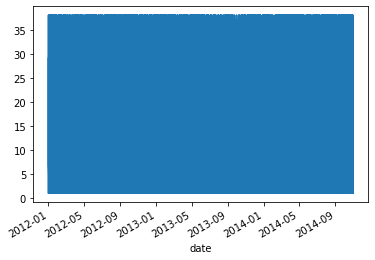

In [60]:
uni_data_df.plot()

In [61]:
# Converting the data into numpy ndarray from pandas
uni_data = uni_data_df.values 

#### Splitting the data in Train and Test and standardize it

In [62]:
TRAIN_SPLIT = 50000

uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

uni_data = (uni_data-uni_train_mean)/uni_train_std
uni_data

array([ 1.5390955 , -0.82844695, -0.9161337 , ..., -0.9161337 ,
       -0.12695289, -0.9161337 ])

#### Augmented Dickey-Fuller test 

When the test statistic is lower than the critical value shown, you reject the null hypothesis and infer that the time series is stationary.

In [14]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
      print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
      print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [15]:
adfuller_test(df_sales_nonzero['units'])

ADF Test Statistic : -20.73283931775442
p-value : 0.0
#Lags Used : 62
Number of Observations : 70057
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


Here P-value is 0.00 which is less than 0.05, which means data is rejecting the null hypothesis, which means data is stationary.

With the first difference and seasonal difference:

In [16]:
df_sales_nonzerox = df_sales_nonzero
df_sales_nonzerox['Sales First Difference'] = df_sales_nonzerox['units'] - df_sales_nonzerox['units'].shift(1)
df_sales_nonzerox['Seasonal First Difference'] = df_sales_nonzerox['units']-df_sales_nonzerox['units'].shift(12)
df_sales_nonzerox.head()

,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,week,day,weekday,season_FALL,season_SPRING,season_SUMMER,season_WINTER,is_holiday,Sales First Difference,Seasonal First Difference
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01,1,9,29,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,2012,1,52,1,1,0,0,0,1,1,NaN,NaN
2012-01-01,1,28,2,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,2012,1,52,1,1,0,0,0,1,1,-27.0,NaN
2012-01-01,1,51,1,1,52.0,31.0,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6,2012,1,52,1,1,0,0,0,1,1,-1.0,NaN
2012-01-01,5,16,24,12,72.0,48.0,60.0,1.738943,54.0,57.0,5.0,0.0,602.28058,1833.067038,0.000000,0.00,30.15,30.19,4.4,25.0,4.8,2012,1,52,1,1,0,0,0,1,1,23.0,NaN
2012-01-01,5,32,1,12,72.0,48.0,60.0,1.738943,54.0,57.0,5.0,0.0,602.28058,1833.067038,0.000000,0.00,30.15,30.19,4.4,25.0,4.8,2012,1,52,1,1,0,0,0,1,1,-23.0,NaN


In [17]:
# Again testing if data is stationary
adfuller_test(df_sales_nonzerox['Seasonal First Difference'].dropna())

ADF Test Statistic : -60.65487466703186
p-value : 0.0
#Lags Used : 60
Number of Observations : 70047
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


#### This figure shows an autocorrelation plot for the sales units from January 1, 2012 to October 30, 2014.

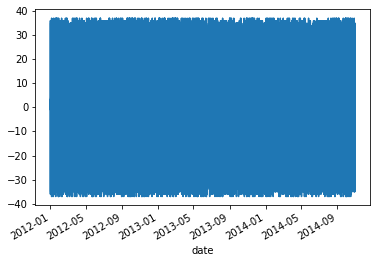

In [18]:
df_sales_nonzerox['Seasonal First Difference'].plot()

#### Auto-correlation Plot:

An autocorrelation plot is designed to show whether the elements of a time series are positively correlated, negatively correlated, or independent of each other. An autocorrelation plot shows the value of the autocorrelation function (acf) on the vertical axis. It can range from –1 to 1.

From the below plot we can observe it don't have any auto-correlation

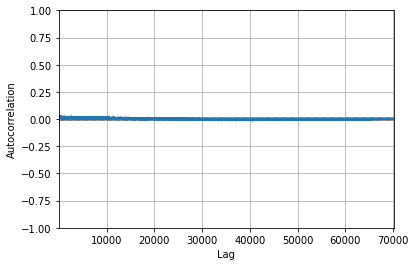

In [19]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_sales_nonzerox['units'])

plt.show()

The graph shows that except for two instance, sales units between January 1, 2012 to October 30, 2014 do not show any particular pattern — they tend to fluctuate randomly around zero. This means that the returns are largely independent of each other.

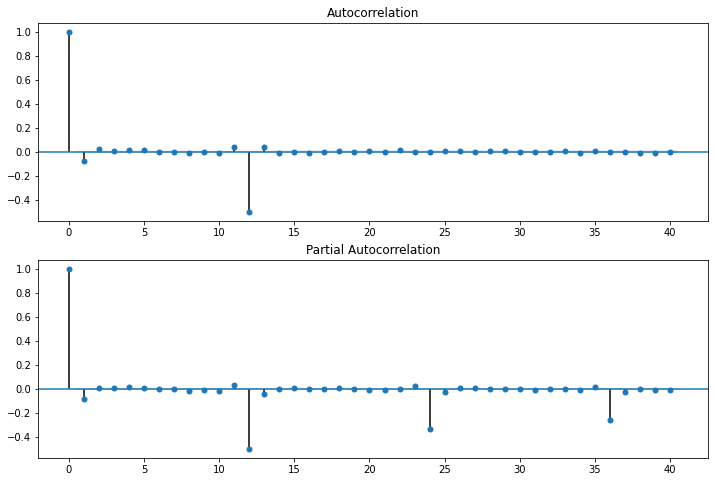

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_acf(df_sales_nonzerox['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)

fig = sm.graphics.tsa.plot_pacf(df_sales_nonzerox['Seasonal First Difference'].dropna(),lags=40,ax=ax2)



#### ARIMA Model:
Using Univeriate Time Series we tried to predict the Sales Units

We have used first 10000 records as input instead whole data to speed up the process and split it into 70-30 as train and test. 

Test RMSE: 1.009


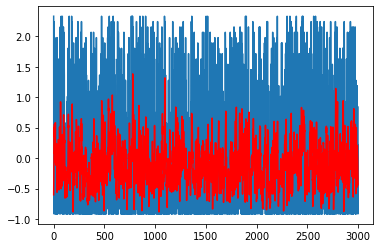

In [ ]:
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA

X = uni_data[:10000]
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]

history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	
	output = model_fit.forecast()
	yhat = output[0]
	
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')

pyplot.show()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.units   No. Observations:                70119
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -270169.929
Method:                       css-mle   S.D. of innovations             11.405
Date:                Tue, 15 Feb 2022   AIC                         540347.858
Time:                        13:36:33   BIC                         540384.490
Sample:                             1   HQIC                        540359.155
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.785e-05   8.93e-05      0.760      0.447      -0.000       0.000
ar.L1.D.units    -0.0842      0.004    -22.270      0.000      -0.092      -0.077
ma.L1.D.units    -0.9978      0.000  -2576.861      0.000      -0.999      -0.997
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -11.8803           +0.0000j           11.8803            0.5000
MA.1            1.0022           +0.0000j            1.0022            0.0000
-----------------------------------------------------------------------------
"""

### Using Deep Learning Models:

#### LSTM Timseries Model:

#### Univariate LSTM Models:

Moving window average:
Given last 'k' values of sales-units (only one feature <=> univariate), predict the next observation. Average the previous k values to predict the next value.

Converting data to univariate timeseries format, we have used k=20 observation.

If we noticed the data split we have 20 less count in training dataset becasue for the first 20 observation consider as one block.

In [13]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
  
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)


# use the above function to create the datasets.

# considering past 20 observation
univariate_past_history = 20

#predicitng current index
univariate_future_target = 0

#split the data set into train and test
x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

print(x_train_uni.shape)

print(y_train_uni.shape)

print(x_val_uni.shape)

print(y_val_uni.shape)

(49980, 20, 1)
(49980,)
(20100, 20, 1)
(20100,)


In [14]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target Sales units to predict')
print (y_train_uni[0])

Single window of past history
[[ 1.5390955 ]
 [-0.82844695]
 [-0.9161337 ]
 [ 1.10066172]
 [-0.9161337 ]
 [ 0.39916766]
 [-0.82844695]
 [ 0.39916766]
 [ 2.32827632]
 [-0.65307343]
 [-0.65307343]
 [-0.65307343]
 [ 1.80215577]
 [-0.74076019]
 [ 1.5390955 ]
 [ 1.45140875]
 [-0.82844695]
 [-0.9161337 ]
 [-0.9161337 ]
 [-0.3023264 ]]

 Target Sales units to predict
-0.8284469462746309


In [15]:
# utility function of 20 time steps
def create_time_steps(length):
  return list(range(-length, 0))

print(create_time_steps(20))

[-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1]


<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

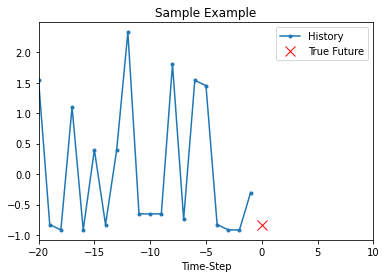

In [16]:
# Plotting function

# plot_data: contains labels as list
# delta: 0 => next time step given last "k" steps.
# title: plot title

# Usage: show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go'] 
  
  time_steps = create_time_steps(plot_data[0].shape[0])
  
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  
  plt.legend()
  
  plt.xlim([time_steps[0], (future+5)*2])
  
  plt.xlabel('Time-Step')
  
  return plt


show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

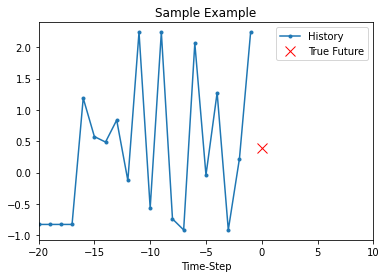

In [17]:
i=20
show_plot([x_train_uni[i], y_train_uni[i]], 0, 'Sample Example')

In [18]:
def mwa(history):
  return np.mean(history)

Sales Units History vs Future:
In the below scatter plot we have mapped 20 days sales units which is in blue line and 'X' denoting the future sales and green dot it the model prediction. 

<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

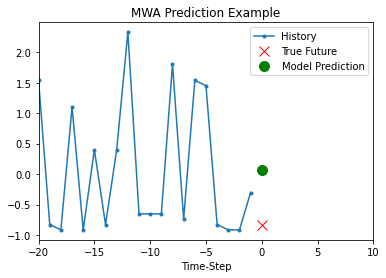

In [19]:
i=0
show_plot([x_train_uni[i], y_train_uni[i], mwa(x_train_uni[i])], 0,
           'MWA Prediction Example')

<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

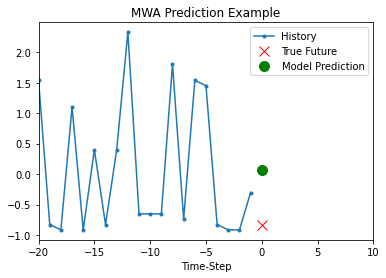

In [20]:
i=0
show_plot([x_train_uni[i], y_train_uni[i], mwa(x_train_uni[i])], 0,
           'MWA Prediction Example')

<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

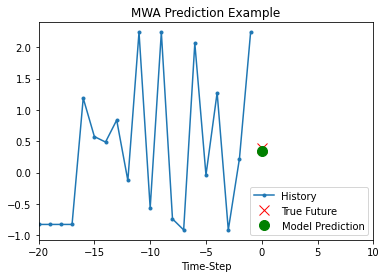

In [21]:
i=20
show_plot([x_train_uni[i], y_train_uni[i], mwa(x_train_uni[i])], 0,
           'MWA Prediction Example')

## Univariate time-series forecasting

-  Features from the history: only units => univariate

- Problem definition: Given last "k=20" values of units, predict the next unit value.

Now, we have fit the univariate data into a LSTM model. With the BATCH_SIZE = 256 and BUFFER_SIZE = 10000. 

We have created cache for memory optimization and shuffle the train dataset. Also, we set the repeat value None so, each batch can repeat infinite times. 
We repeated the same step validation/test data as well.


In [22]:
# TF Dataset preperation
BATCH_SIZE = 256    # bacth size in batch-SGD/variants
BUFFER_SIZE = 10000   # for shuffling the dataset

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))

train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

#https://www.tensorflow.org/api_docs/python/tf/data/Dataset#repeat

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))

val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

print(train_univariate)

print(val_univariate)

<RepeatDataset element_spec=(TensorSpec(shape=(None, 20, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
<RepeatDataset element_spec=(TensorSpec(shape=(None, 20, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


After that we called the LSTM model which have 8 layers. Each layer will be executed sequentially, once all 8 layers executed it will go to dense layer.

We have used ‘ADAM’ as our optimization technique. Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. The method is really efficient when working with large problem involving a lot of data or parameters. It requires less memory and is efficient.

We have used Mean square Error as our error metric.  

For each EPOCH we have the trained the model 200 steps. So, each batch size of 256 will iterate 200 times and we will run it for total 10 EPOCH.


In [25]:
# MODEL:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')

In [26]:
# Train and evaluate
STEPS_PER_EPOCH = 200
EPOCHS = 20

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=STEPS_PER_EPOCH,
                      validation_data=val_univariate, validation_steps=50)

Epoch 1/20
200/200 [==============================] - 12s 23ms/step - loss: 0.1632 - val_loss: 0.1732
Epoch 2/20
200/200 [==============================] - 4s 18ms/step - loss: 0.1572 - val_loss: 0.1741
Epoch 3/20
200/200 [==============================] - 3s 17ms/step - loss: 0.1573 - val_loss: 0.1779
Epoch 4/20
200/200 [==============================] - 3s 16ms/step - loss: 0.1574 - val_loss: 0.1790
Epoch 5/20
200/200 [==============================] - 3s 17ms/step - loss: 0.1568 - val_loss: 0.1787
Epoch 6/20
200/200 [==============================] - 4s 18ms/step - loss: 0.1563 - val_loss: 0.1816
Epoch 7/20
200/200 [==============================] - 3s 17ms/step - loss: 0.1573 - val_loss: 0.1814
Epoch 8/20
200/200 [==============================] - 3s 17ms/step - loss: 0.1563 - val_loss: 0.1811
Epoch 9/20
200/200 [==============================] - 3s 17ms/step - loss: 0.1571 - val_loss: 0.1818
Epoch 10/20
200/200 [==============================] - 3s 17ms/step - loss: 0.1566 - val_l

Validation of the univariate model:

As a last step we have took 5 random data point and plotted them with history, true future and model predicted value.

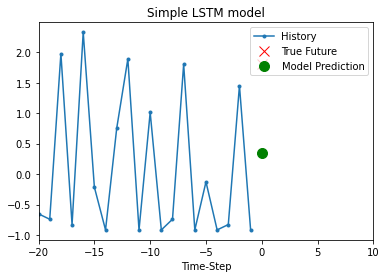

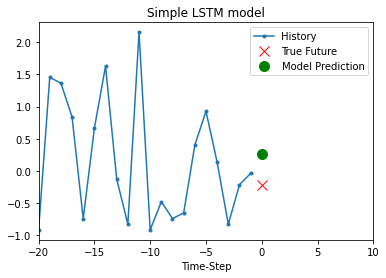

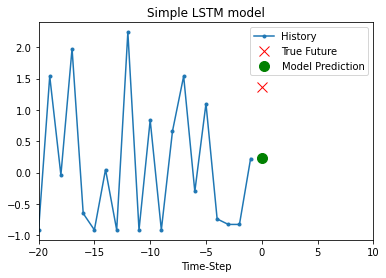

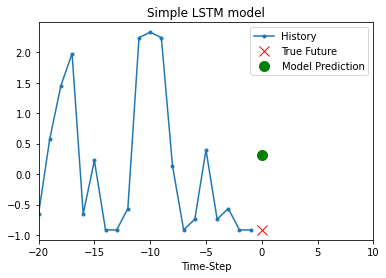

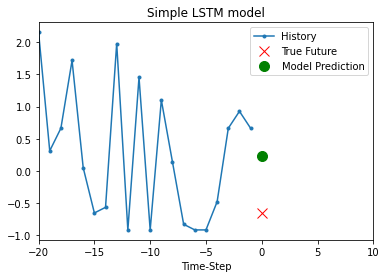

In [35]:
for x, y in val_univariate.take(5): # take 5 random inputs from validation data
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()

## Multi-variate & single-step forecasting

As the name states here, we will use multiple features to predict the target variable for a single point. 
So basically, we will predict sales units of one-time step value using same moving average window (K=20) but now we will use multiple features. 
We have used the same features we used in classical machine learning models.


In [36]:
# Features
features_considered = ["store_nbr", "item_nbr", "station_nbr","weekday","is_holiday",'tavg', 'depart', 'dewpoint','wetbulb', 'heat', 'cool', 'sunrise', 
            'sunset','snowfall','preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir','avgspeed']

features = df_train_final_ad[features_considered]
features.index = df_train_final_ad['date']
features.head()

,store_nbr,item_nbr,station_nbr,weekday,is_holiday,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
date,,,,,,,,,,,,,,,,,,,,
2012-01-01,1,1,1,1,1,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6
2012-01-01,1,2,1,1,1,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6
2012-01-01,1,3,1,1,1,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6
2012-01-01,1,4,1,1,1,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6
2012-01-01,1,5,1,1,1,42.0,1.738943,36.0,40.0,23.0,0.0,602.28058,1833.067038,0.014679,0.05,29.78,29.92,3.6,20.0,4.6


In [37]:
# Standardize data

dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

dataset = (dataset-data_mean)/data_std

Here, we have updated the existing univariate function which is converting the data into timeseries format and renamed it as multivariate function. The key change in this function we made ‘single_step=False’, which would be updated in runtime.

In [38]:
# Same as univariate_data above.

# New params:

# step: instead of taking data for each 10min, do you want to generate data once evrey 6 steps (60min)

# single_step: lables from single timestamp or multiple timesteps


def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step) # step used here.
  
    data.append(dataset[indices])

    if single_step: # single_step used here.
      labels.append(target[i+target_size]) 
    else:
      labels.append(target[i:i+target_size]) 

  return np.array(data), np.array(labels)

In [39]:
# Generate data
past_history = 15 
future_target = 5

STEP = 3 

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

print(x_train_single.shape)

print(y_train_single.shape)

(49985, 5, 20)
(49985,)


In [40]:
#TF dataset

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))

train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))

val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

print(train_data_single)

print(val_data_single)

<RepeatDataset element_spec=(TensorSpec(shape=(None, 5, 20), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
<RepeatDataset element_spec=(TensorSpec(shape=(None, 5, 20), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


In [41]:
# Model
single_step_model = tf.keras.models.Sequential()

single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))

single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mean_squared_logarithmic_error')

single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=STEPS_PER_EPOCH,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Epoch 1/20
200/200 [==============================] - 26s 42ms/step - loss: 0.0716 - val_loss: 0.0695
Epoch 2/20
200/200 [==============================] - 34s 169ms/step - loss: 0.0433 - val_loss: 0.0484
Epoch 3/20
200/200 [==============================] - 50s 246ms/step - loss: 0.0274 - val_loss: 0.0389
Epoch 4/20
200/200 [==============================] - 54s 268ms/step - loss: 0.0168 - val_loss: 0.0318
Epoch 5/20
200/200 [==============================] - 39s 197ms/step - loss: 0.0114 - val_loss: 0.0262
Epoch 6/20
200/200 [==============================] - 54s 261ms/step - loss: 0.0089 - val_loss: 0.0220
Epoch 7/20
200/200 [==============================] - 98s 414ms/step - loss: 0.0077 - val_loss: 0.0206
Epoch 8/20
200/200 [==============================] - 58s 278ms/step - loss: 0.0070 - val_loss: 0.0221
Epoch 9/20
200/200 [==============================] - 65s 305ms/step - loss: 0.0062 - val_loss: 0.0160
Epoch 10/20
200/200 [==============================] - 74s 356ms/step - lo

#### Plotting the training and test loss. 

•	We can observe initial loss was high for both train and test but it got reduced drastically as soon as EPOCH iteration increased.. <br/>
•	Also, we observed there are marginal difference between train and test loss. hence, we can confirm model is performing well with both train and test data and it is not overfitted.


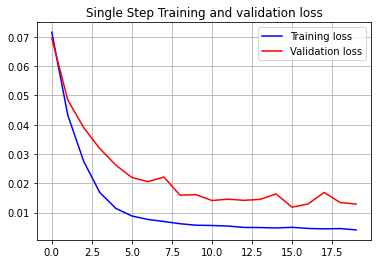

In [42]:
# Plot train and validation loss over epochs

def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  
  plt.title(title)
  plt.legend()
  
  plt.grid()

  plt.show()

plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

Validation of the multivariate single model:

Similar to univariate model as a last step we have took 5 random data point and plotted them with history, true future and model predicted value.

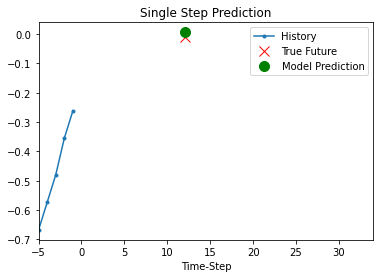

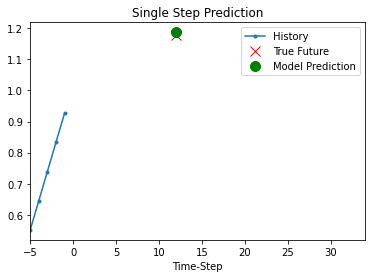

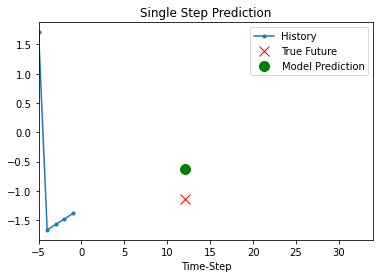

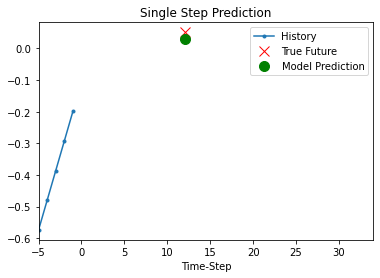

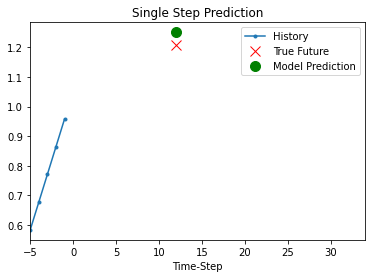

In [43]:
# plot time series and predicted values

for x, y in val_data_single.take(5):
  plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Single Step Prediction')
  plot.show()

## Multi-variate & multi-step forecasting
- Generate multiple future values of sales units

In [63]:
future_target = 7
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

print(x_train_multi.shape)

print(y_train_multi.shape)

print(x_val_multi.shape)

print(y_val_multi.shape)

(49985, 5, 20)
(49985, 7)
(4336584, 5, 20)
(4336584, 7)


In [64]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))

train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))

val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

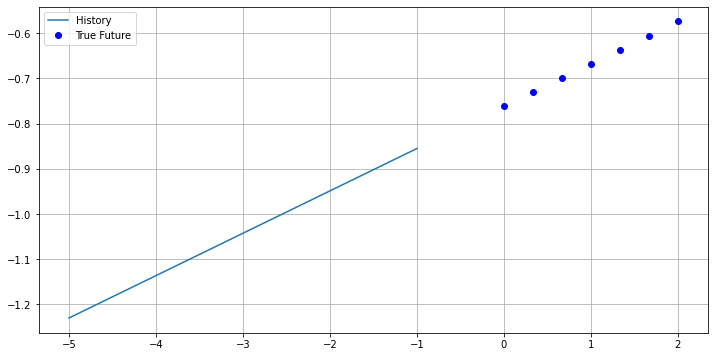

In [65]:
#plotting function
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  
  num_in = create_time_steps(len(history))
  num_out = len(true_future)
  
  plt.grid()
  
  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  
  plt.show()
  


for x, y in train_data_multi.take(1):
  multi_step_plot(x[0], y[0], np.array([0]))

We have implemented same sequential model code as univariate model but here we used 3216 LSTM layer and 7 dense layer matching with the future target.

In [66]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))

multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))

multi_step_model.add(tf.keras.layers.Dense(7)) # for 7 outputs

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mean_squared_logarithmic_error')

multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=STEPS_PER_EPOCH,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Epoch 1/20
200/200 [==============================] - 112s 460ms/step - loss: 0.0790 - val_loss: 0.0432
Epoch 2/20
200/200 [==============================] - 58s 288ms/step - loss: 0.0248 - val_loss: 0.0221
Epoch 3/20
200/200 [==============================] - 74s 367ms/step - loss: 0.0151 - val_loss: 0.0181
Epoch 4/20
200/200 [==============================] - 48s 238ms/step - loss: 0.0115 - val_loss: 0.0152
Epoch 5/20
200/200 [==============================] - 58s 280ms/step - loss: 0.0092 - val_loss: 0.0202
Epoch 6/20
200/200 [==============================] - 46s 213ms/step - loss: 0.0078 - val_loss: 0.0174
Epoch 7/20
200/200 [==============================] - 42s 199ms/step - loss: 0.0067 - val_loss: 0.0159
Epoch 8/20
200/200 [==============================] - 39s 181ms/step - loss: 0.0060 - val_loss: 0.0116
Epoch 9/20
200/200 [==============================] - 19s 85ms/step - loss: 0.0058 - val_loss: 0.0114
Epoch 10/20
200/200 [==============================] - 55s 274ms/step - l

#### Plotting the training and test loss
•         We can observe the initial loss was high for both train and test but it got reduced drastically as soon as EPOCH iteration increased, similar to multivariate single step model. <br/>
•         Also, we observed there are marginal differences between train and test loss. Hence, we can confirm the model is performing well with both train and test data and it is not overfitted.


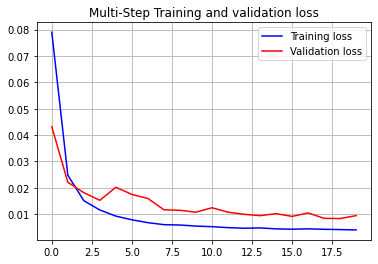

In [67]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

Validation of the multivariate multistep data:

Similar to univariate model as a last step we have took 3 random data point and plotted them with history, true future and model predicted value.

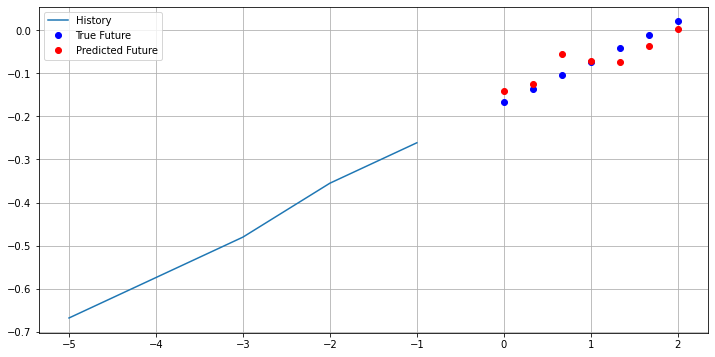

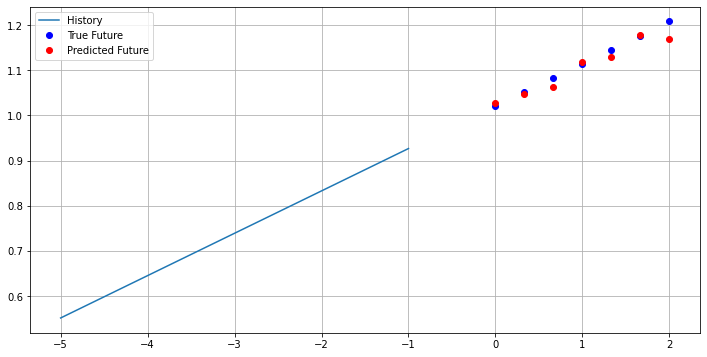

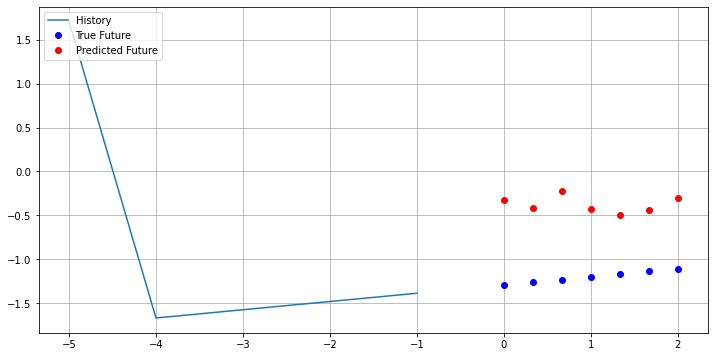

In [68]:
for x, y in val_data_multi.take(3):
  multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])

In [69]:
import pickle
# open a file, where you ant to store the data
file = open('single_step_history.pkl', 'wb')

# dump information to that file
pickle.dump(single_step_history, file)

INFO:tensorflow:Assets written to: ram://f9239264-64d4-4dc7-8152-f1d2001c4fc2/assets


INFO:tensorflow:Assets written to: ram://f9239264-64d4-4dc7-8152-f1d2001c4fc2/assets
